# Imports

- Carregamento de bibliotecas
- Configurações de apoio no notebook
- Configurações de design gráficos

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import os
import warnings

import datetime

import missingno as msno
from tqdm import tqdm

In [2]:
warnings.filterwarnings('ignore')

In [3]:
mpl.rcParams['figure.figsize'] = (12,4)
mpl.rcParams['figure.dpi']     = 300
sns.set_style('darkgrid')

In [4]:
tqdm.pandas()

# **Contexto do problema**

Você trabalha como Analista de Dados em uma empresa que fornece um serviço de rede social. O acesso ao serviço é concedido por meio de assinaturas mensais e os membros podem interagir por meio de comentários, respostas, adição de amigos e outras ações similares.

Alguns colaboradores perceberam uma alta evasão de membros da plataforma. Para validar tal hipótese, foi disponibilizado a você um conjunto de bases de dados que contempla informações sobre os assinantes e seus eventos na plataforma.


**Você deve:**


 * Validar a hipótese levantada pelos seus colegas
 * Montar uma estratégia para redução do churn com base nos dados fornecidos.
 * Esperamos um enfoque no negócio baseado em métricas e gráficos. 

# Carregamento de tabelas (Data Loading)

- Definição de caminhos para os datasets
- Carregamentos dos datasets utilizando Pandas

In [5]:
path_account      = os.path.join('data','Dataset do Case de Analista_Cientista de Dados','account.csv')
path_event_type   = os.path.join('data','Dataset do Case de Analista_Cientista de Dados','event_type.csv')
path_event        = os.path.join('data','Dataset do Case de Analista_Cientista de Dados','event.csv')
path_subscription = os.path.join('data','Dataset do Case de Analista_Cientista de Dados','subscription.csv')

In [6]:
account      = pd.read_csv(path_account)
event_type   = pd.read_csv(path_event_type)
event        = pd.read_csv(path_event)
subscription = pd.read_csv(path_subscription)

## Diagrama de Tabelas

- Diagrama de ligação entre as tabelas carregadas

<img src="img/table_schemas.png" height = 5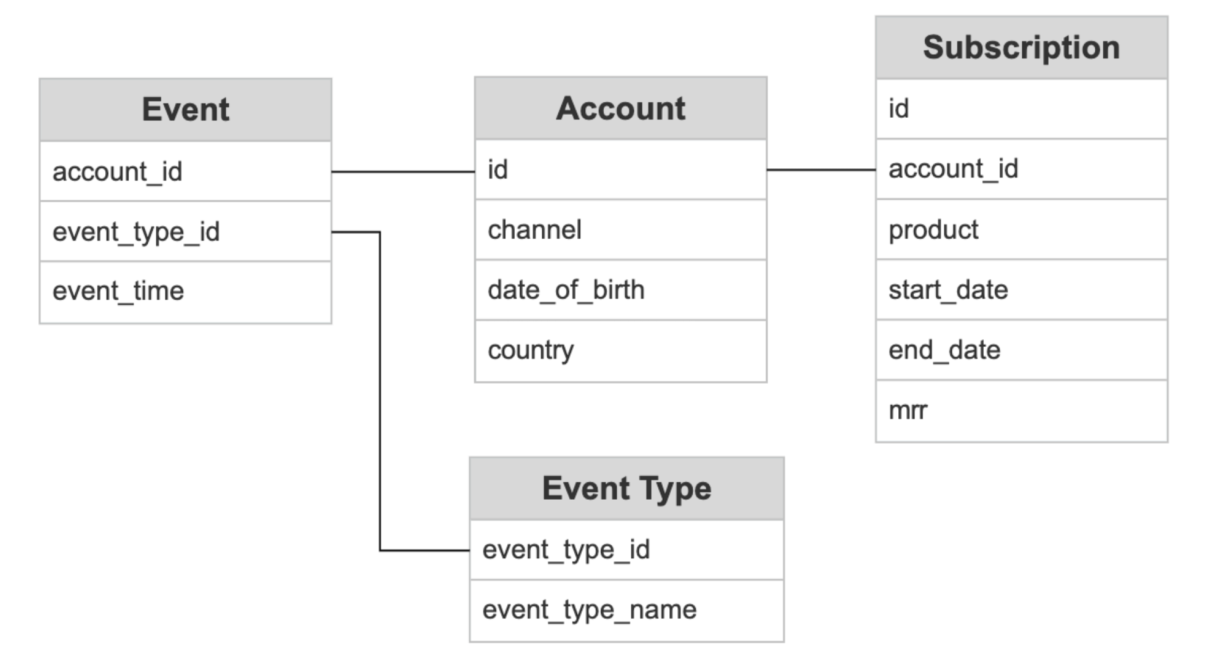00 width = 800>

## Avaliação inicial dos dados

 - Visualização de informações sobre os dados

In [7]:
display(account.head()), account.info()

id    channel date_of_birth country
0   1  appstore2    1948-09-10      CN
1   2  appstore1    1952-11-06      AU
2   3  appstore1    2002-11-10      GB
3   4  appstore1    1976-06-18      US
4   5  appstore1    1975-11-18      KR

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14641 entries, 0 to 14640
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             14641 non-null  int64 
 1   channel        14641 non-null  object
 2   date_of_birth  14641 non-null  object
 3   country        13030 non-null  object
dtypes: int64(1), object(3)
memory usage: 457.7+ KB


(None, None)

In [8]:
display(event_type.head()), account.info()

event_type_id event_type_name
0              0            post
1              1       newfriend
2              2            like
3              3          adview
4              4         dislike

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14641 entries, 0 to 14640
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             14641 non-null  int64 
 1   channel        14641 non-null  object
 2   date_of_birth  14641 non-null  object
 3   country        13030 non-null  object
dtypes: int64(1), object(3)
memory usage: 457.7+ KB


(None, None)

In [9]:
display(event.head()), event.info()

account_id           event_time  event_type_id
0           1  2020-01-06 03:20:00              0
1           1  2020-01-06 00:55:29              0
2           1  2020-01-06 10:16:34              1
3           1  2020-01-06 09:31:16              2
4           1  2020-01-06 20:40:21              2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17746587 entries, 0 to 17746586
Data columns (total 3 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   account_id     int64 
 1   event_time     object
 2   event_type_id  int64 
dtypes: int64(2), object(1)
memory usage: 406.2+ MB


(None, None)

In [10]:
display(subscription.head()), subscription.info()

id  account_id   product  start_date    end_date   mrr
0   0           1  standard  2020-01-06  2020-02-06  9.99
1   1           1  standard  2020-02-06  2020-03-06  9.99
2   2           1  standard  2020-03-06  2020-04-06  9.99
3   3           1  standard  2020-04-06  2020-05-06  9.99
4   4           1  standard  2020-05-06  2020-06-06  9.99

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55502 entries, 0 to 55501
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          55502 non-null  int64  
 1   account_id  55502 non-null  int64  
 2   product     55502 non-null  object 
 3   start_date  55502 non-null  object 
 4   end_date    55502 non-null  object 
 5   mrr         55502 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.5+ MB


(None, None)

In [11]:
print('*'*5,'Table Shapes', '*'*5, '\n')
(print(f'Tabela account: \t{account.shape[1]} features, {account.shape[0]} registros'))
(print(f'Tabela event_type: \t{event_type.shape[1]} features, {event_type.shape[0]} registros'))
(print(f'Tabela event: \t\t{event.shape[1]} features, {event.shape[0]} registros'))
(print(f'Tabela subscription: \t{subscription.shape[1]} features, {subscription.shape[0]} registros'))

***** Table Shapes ***** 

Tabela account: 	4 features, 14641 registros
Tabela event_type: 	2 features, 8 registros
Tabela event: 		3 features, 17746587 registros
Tabela subscription: 	6 features, 55502 registros


# Pré-processamento dos dados (Data preprocessing)

1. Correção dos tipos de dados de features
2. Identificação de valores missing
3. Identificação de registros duplicados

## Estruturação dos dados (Data Structuring)
- Correção dos tipos de dados em cada tabela

### Account Table

In [12]:
account.channel.unique()

array(['appstore2', 'appstore1', 'web'], dtype=object)

In [13]:
account.country.unique()

array(['CN', 'AU', 'GB', 'US', 'KR', 'IT', 'MX', 'CO', 'JP', nan, 'BR',
       'DE', 'ES', 'RU', 'AR', 'NO', 'CH', 'SE', 'IN', 'CA', 'ID', 'FR',
       'DK', 'GR', 'NZ', 'PT', 'NL'], dtype=object)

In [14]:
account.id.unique()

array([    1,     2,     3, ..., 14639, 14640, 14641])

In [15]:
account['channel']       = account['channel'].astype('category')
account['country']       = account['country'].astype('category')
account['date_of_birth'] = pd.to_datetime(account['date_of_birth'], format='%Y-%m-%d')

In [16]:
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14641 entries, 0 to 14640
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             14641 non-null  int64         
 1   channel        14641 non-null  category      
 2   date_of_birth  14641 non-null  datetime64[ns]
 3   country        13030 non-null  category      
dtypes: category(2), datetime64[ns](1), int64(1)
memory usage: 258.9 KB


### Event Table

In [17]:
event.columns

Index(['account_id', 'event_time', 'event_type_id'], dtype='object')

In [18]:
event.event_type_id.unique()

array([0, 1, 2, 3, 6, 7, 4, 5])

In [19]:
event['event_type_id'] = event['event_type_id'].astype('category')
event['event_time']    = pd.to_datetime(event['event_time'], format='%Y-%m-%d %H:%M:%S')
event['account_id']    = event['account_id'].astype('category')

In [20]:
event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17746587 entries, 0 to 17746586
Data columns (total 3 columns):
 #   Column         Dtype         
---  ------         -----         
 0   account_id     category      
 1   event_time     datetime64[ns]
 2   event_type_id  category      
dtypes: category(2), datetime64[ns](1)
memory usage: 186.8 MB


### Event Type Table

In [21]:
event_type.columns

Index(['event_type_id', 'event_type_name'], dtype='object')

In [22]:
event_type.event_type_id.unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [23]:
event_type.event_type_name.unique()

array(['post', 'newfriend', 'like', 'adview', 'dislike', 'unfriend',
       'message', 'reply'], dtype=object)

In [24]:
event_type.event_type_id   = event_type.event_type_id.astype('category')
event_type.event_type_name = event_type.event_type_name.astype('category')

A tabela apresenta apenas valores únicos e de acordo com o tipo já atribuído, portanto, não há necessidade de conversão de tipos.

### Subscription Table

In [25]:
subscription.head()

id  account_id   product  start_date    end_date   mrr
0   0           1  standard  2020-01-06  2020-02-06  9.99
1   1           1  standard  2020-02-06  2020-03-06  9.99
2   2           1  standard  2020-03-06  2020-04-06  9.99
3   3           1  standard  2020-04-06  2020-05-06  9.99
4   4           1  standard  2020-05-06  2020-06-06  9.99

In [26]:
subscription['product'].unique()

array(['standard'], dtype=object)

In [27]:
subscription['mrr'].unique()

array([9.99])

In [28]:
subscription['account_id'].unique()

array([    1,     2,     3, ..., 14639, 14640, 14641])

In [29]:
subscription['start_date']    = pd.to_datetime(subscription.start_date, format='%Y-%m-%d')
subscription['end_date']      = pd.to_datetime(subscription.end_date, format='%Y-%m-%d')

subscription['product']       = subscription['product'].astype('category')
subscription['account_id']    = subscription['account_id'].astype('category')

In [30]:
subscription.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55502 entries, 0 to 55501
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          55502 non-null  int64         
 1   account_id  55502 non-null  category      
 2   product     55502 non-null  category      
 3   start_date  55502 non-null  datetime64[ns]
 4   end_date    55502 non-null  datetime64[ns]
 5   mrr         55502 non-null  float64       
dtypes: category(2), datetime64[ns](2), float64(1), int64(1)
memory usage: 2.5 MB


## Valores Missing
- Identificação de valores faltantes em cada tabela

In [31]:
account.isna().sum()

id                  0
channel             0
date_of_birth       0
country          1611
dtype: int64

In [32]:
event_type.isna().sum()

event_type_id      0
event_type_name    0
dtype: int64

In [33]:
event.isna().sum()

account_id       0
event_time       0
event_type_id    0
dtype: int64

In [34]:
subscription.isna().sum()

id            0
account_id    0
product       0
start_date    0
end_date      0
mrr           0
dtype: int64

Apenas a tabela ***account*** apresenta valores faltantes. São 1611 valores faltantes na coluna do país de origem dos clientes.

In [35]:
(account.country.value_counts())

CN    2241
US    2153
JP     740
BR     725
IN     631
CA     613
GB     595
DE     592
AU     576
MX     523
KR     450
AR     430
FR     417
NZ     318
CO     288
RU     270
ID     159
DK     158
NL     155
ES     153
GR     150
NO     149
IT     143
CH     137
SE     137
PT     127
Name: country, dtype: int64

<AxesSubplot:>

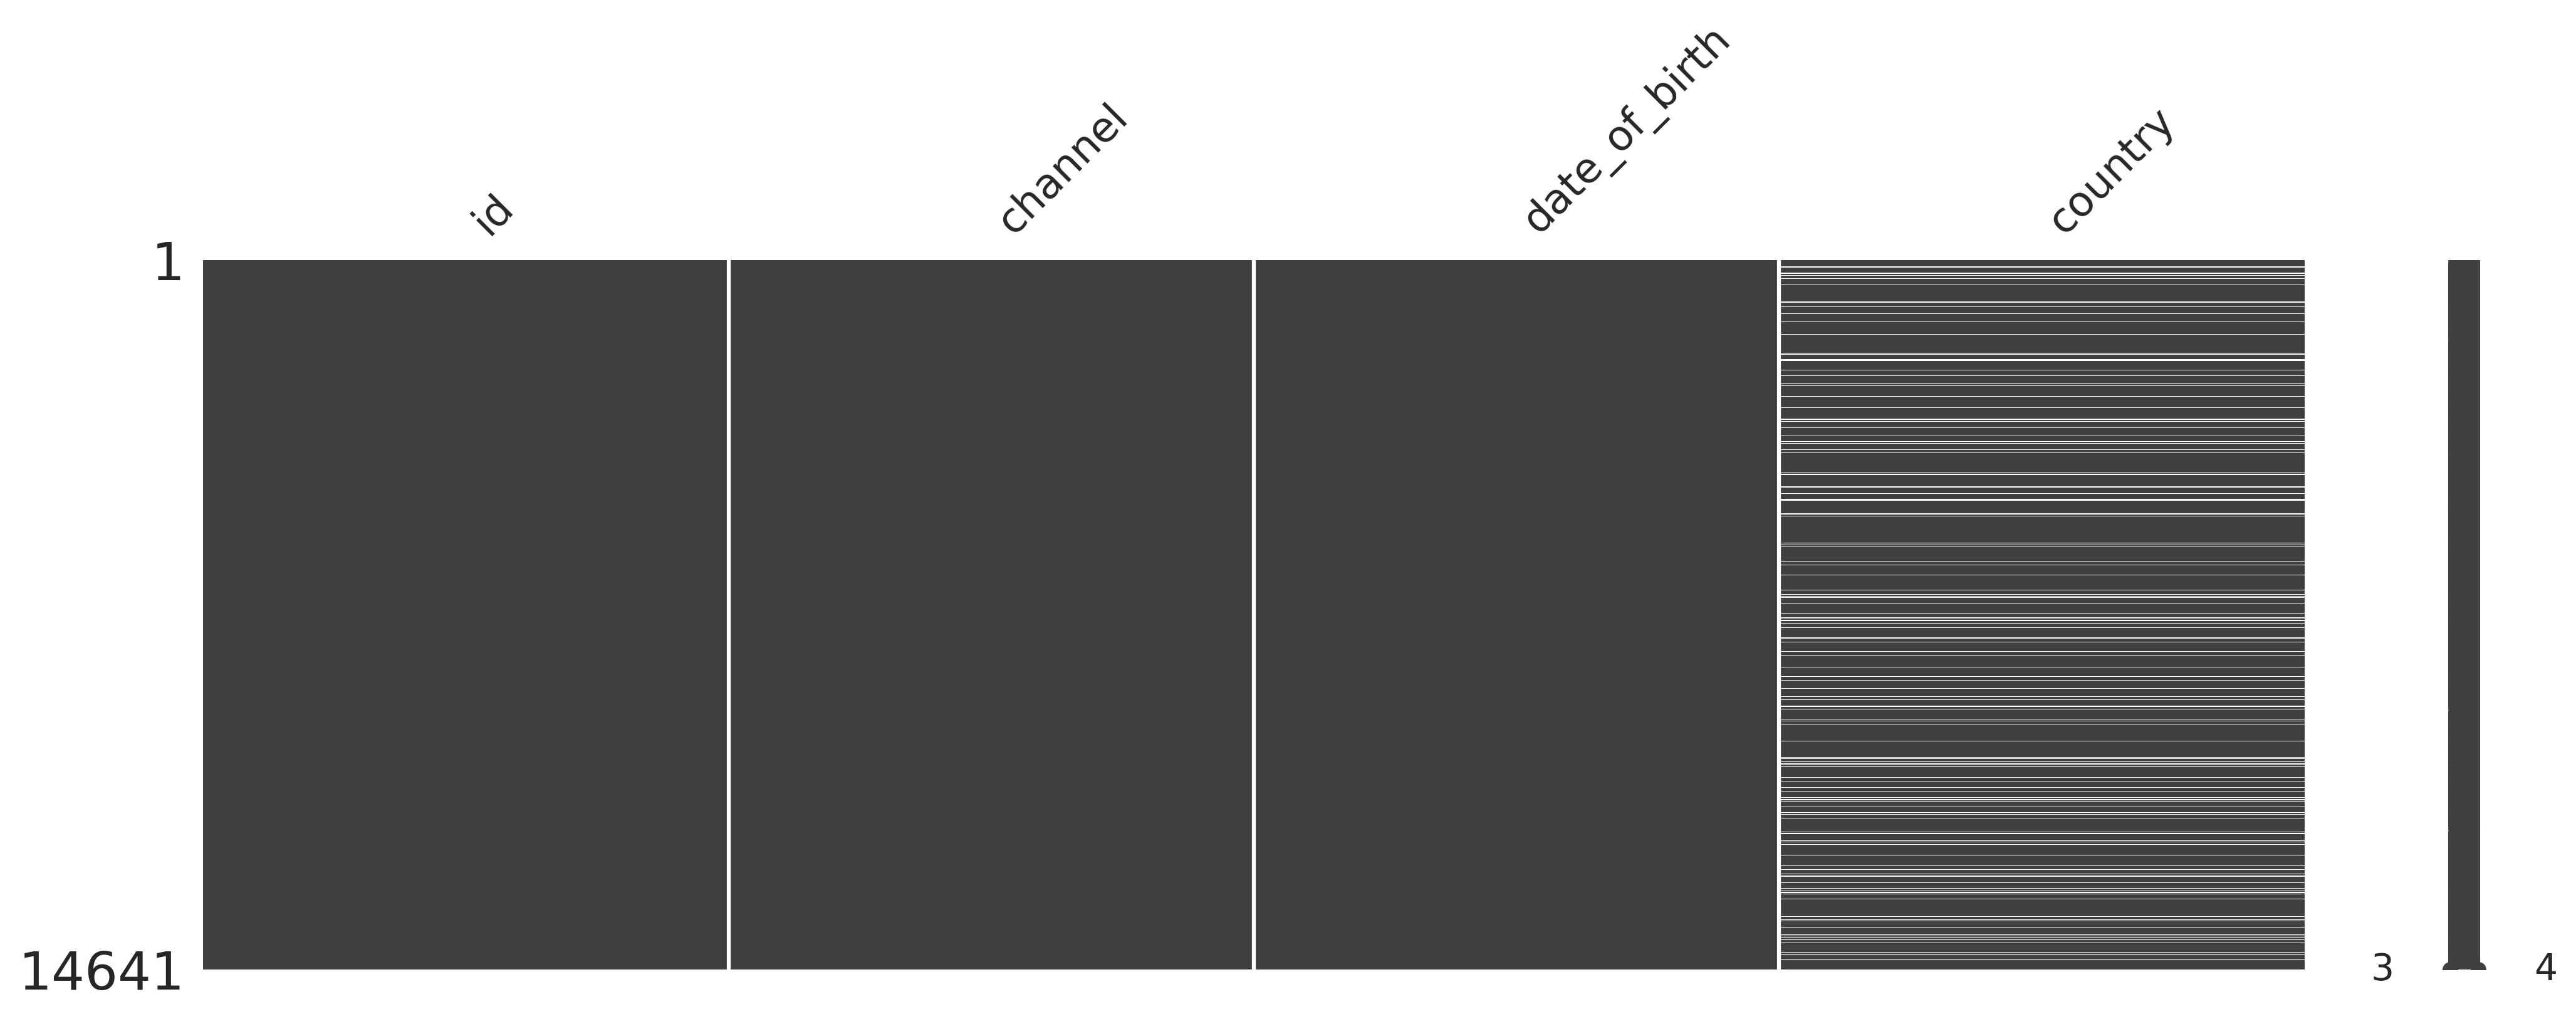

In [36]:
msno.matrix(account, figsize = (16,5))

Como são muitos valores únicos na feature e os valores faltantes estão uniformemente distribuídos no dataset, não é possível fazer alguma dedução segura para uma imputação imediata. O tratamento será feito de acordo com a situação que a variável for trabalhada.

## Duplicatas
- Identificação de valores duplicadas nas tabelas

In [37]:
print(f'Duplicatas em Event: {event.duplicated().sum()}')
print(f'Duplicatas em Account: {account.duplicated().sum()}')
print(f'Duplicatas em Subscription: {subscription.duplicated().sum()}')
print(f'Duplicatas em Event_Type: {event_type.duplicated().sum()}')

Duplicatas em Event: 1296
Duplicatas em Account: 0
Duplicatas em Subscription: 0
Duplicatas em Event_Type: 0


In [38]:
event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17746587 entries, 0 to 17746586
Data columns (total 3 columns):
 #   Column         Dtype         
---  ------         -----         
 0   account_id     category      
 1   event_time     datetime64[ns]
 2   event_type_id  category      
dtypes: category(2), datetime64[ns](1)
memory usage: 186.8 MB


Considerando que a coluna ***event_time*** da tabela ***event*** dá a precisão em segundos da ocorrência do evento, pode-se considerar as linhas duplicadas nesta tabela como realmente um registro duplo da mesma ocorrência. Sendo assim, portanto, é razoável que sejam retiradas da análise

In [39]:
event.drop_duplicates(inplace = True)

In [40]:
# Preservar RangeIndex para redução do uso de memória
event.reset_index(drop = True, inplace = True)

In [41]:
print(f'Duplicatas em Event: {event.duplicated().sum()}')
print(f'Duplicatas em Account: {account.duplicated().sum()}')
print(f'Duplicatas em Subscription: {subscription.duplicated().sum()}')
print(f'Duplicatas em Event_Type: {event_type.duplicated().sum()}')

Duplicatas em Event: 0
Duplicatas em Account: 0
Duplicatas em Subscription: 0
Duplicatas em Event_Type: 0


In [42]:
event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17745291 entries, 0 to 17745290
Data columns (total 3 columns):
 #   Column         Dtype         
---  ------         -----         
 0   account_id     category      
 1   event_time     datetime64[ns]
 2   event_type_id  category      
dtypes: category(2), datetime64[ns](1)
memory usage: 186.8 MB


In [43]:
event.head()

account_id          event_time event_type_id
0          1 2020-01-06 03:20:00             0
1          1 2020-01-06 00:55:29             0
2          1 2020-01-06 10:16:34             1
3          1 2020-01-06 09:31:16             2
4          1 2020-01-06 20:40:21             2

# Análise Exploratória de Dados (EDA)

Questões levantadas:

A interação dos usuários com a plataforma pode ser estimada pelos registros de atividades gerados pelo log na tabela **event**. Então, vamos começar fazendo uma análise do volume de interações no espaço temporal fornecido na tabela ***events***.

### Qual o período coberto pela base de dados?

In [44]:
print(f'Início: {event.event_time.min()} \nFim: \t{event.event_time.max()}')

Início: 2020-01-01 00:00:01 
Fim: 	2020-06-30 23:59:59


O período analisado ocorre do início do ano de 2020, em janeiro até o término do mês de junho.

In [45]:
event['month'] = event.event_time.dt.month
event.month    = event.month.astype('category')

## Volume mensal de interações

In [46]:
month_groupby = event.groupby('month')

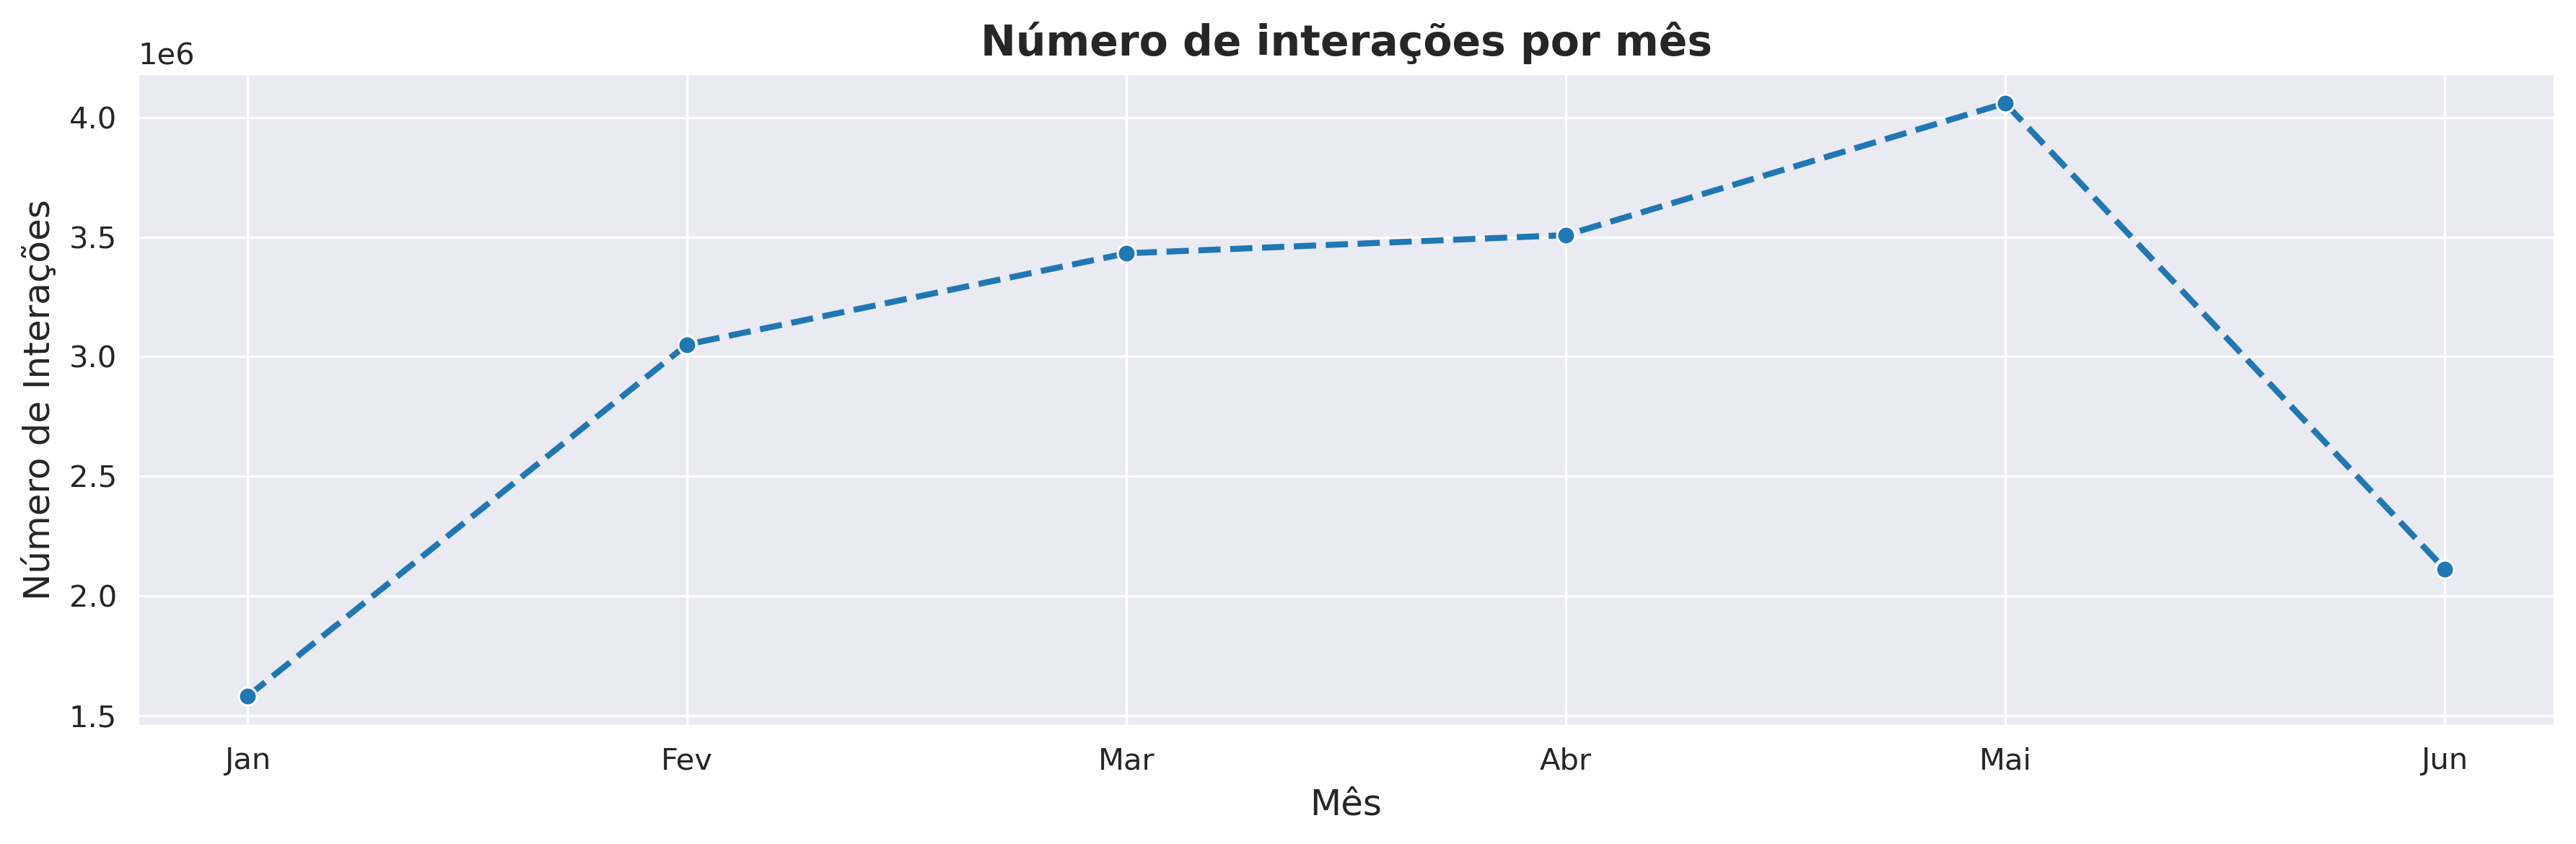

In [47]:
sns.lineplot(x         = month_groupby['account_id'].count().index, 
             y         = month_groupby['account_id'].count().values, 
             marker    = 'o', 
             linewidth = 2, 
             linestyle = '--')

plt.xticks(ticks = np.arange(1,7), labels = ['Jan','Fev','Mar','Abr','Mai','Jun'])
plt.ylabel('Número de Interações', fontsize = 12)
plt.xlabel('Mês', fontsize = 12)
plt.title('Número de interações por mês', fontdict = {'fontsize':14, 'weight':'bold'})
plt.tight_layout()
plt.show()

O gráfico mostra que o número de interações com a plataforma vinha numa crescente até o mês de maio onde atingiu seu pico. No mês de junho houve uma redução drástica sendo o menor número de interações registrados no mês desde o mês de janeiro.

In [48]:
meses = dict(zip(np.arange(1,7), ['Jan','Fev','Mar','Abr','Mai','Jun']))

In [49]:
grouped_interactions = event.groupby('event_type_id')

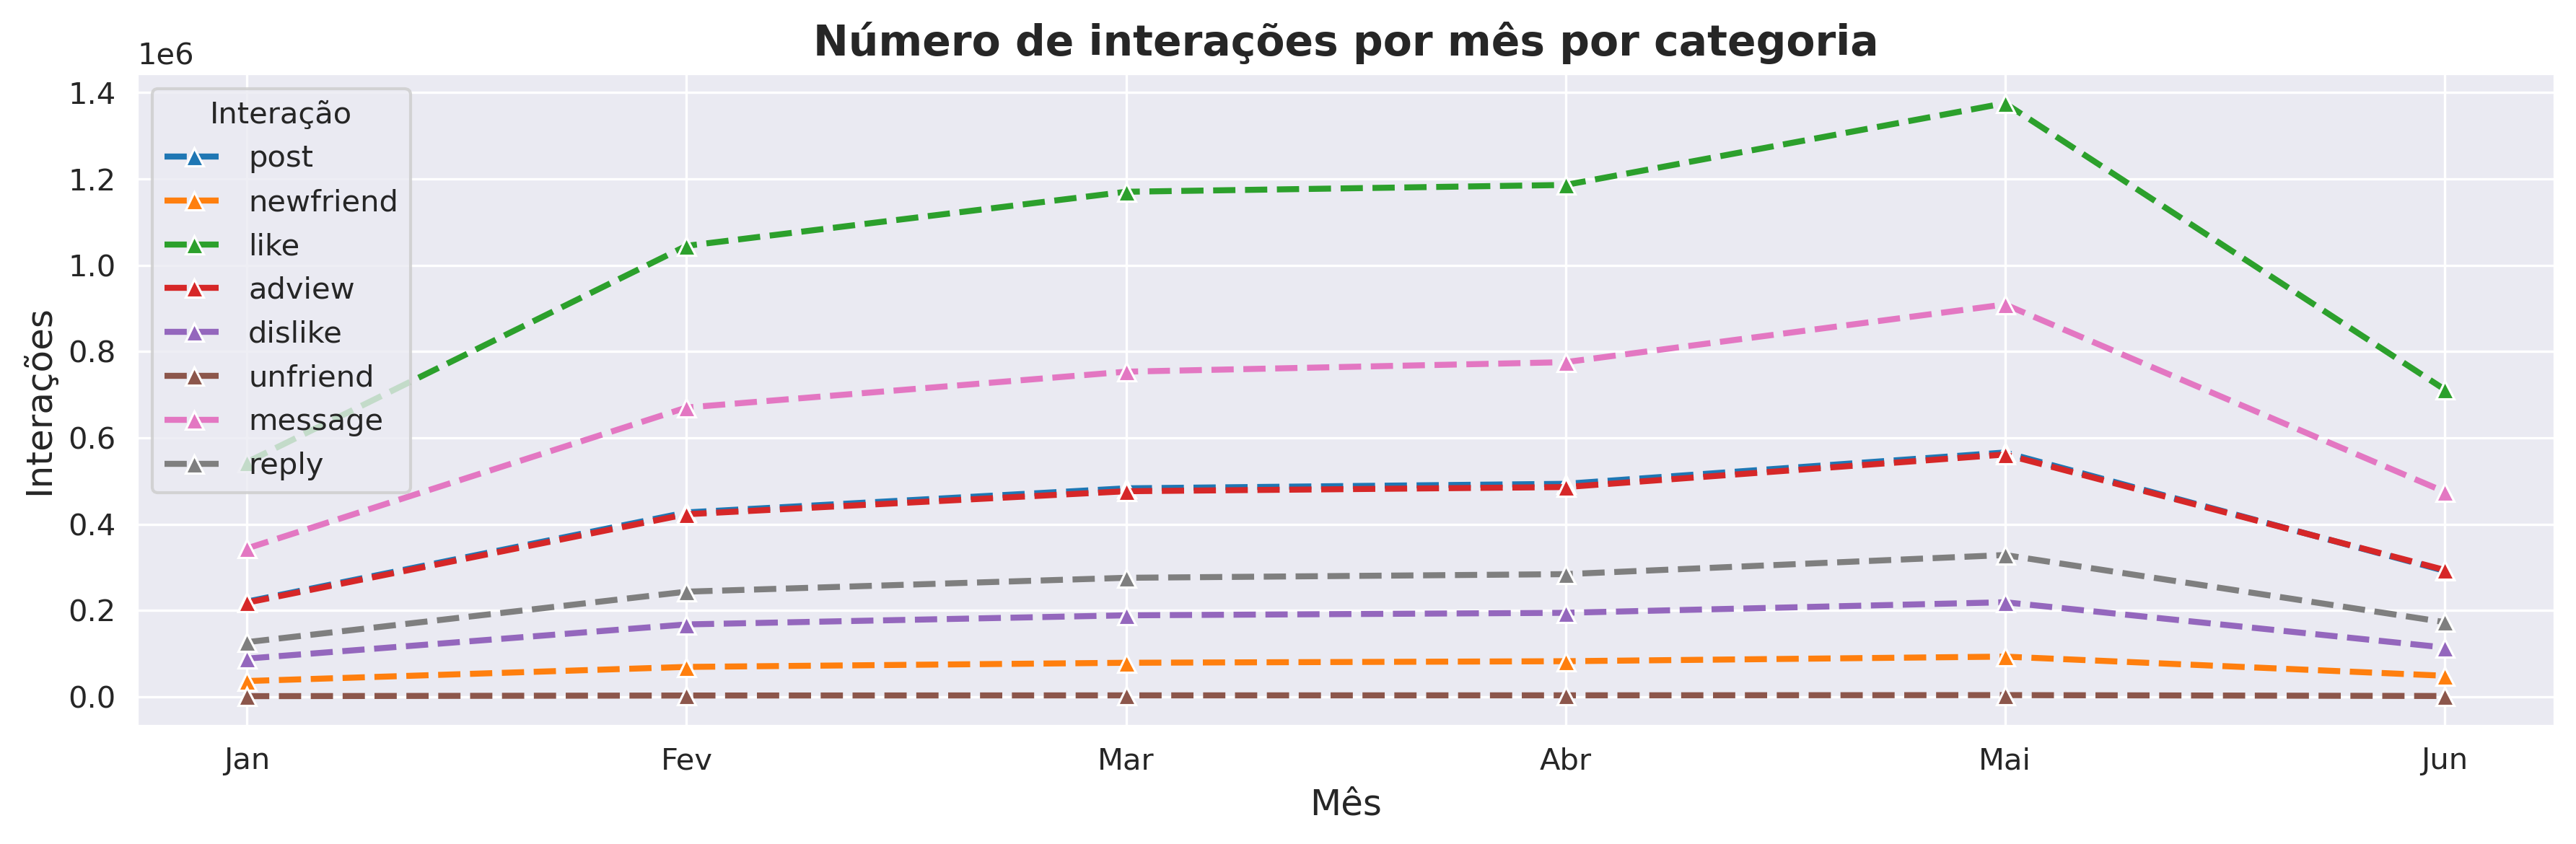

In [50]:
for interaction, group in grouped_interactions:
    
    ax = sns.lineplot(x         = group.month.value_counts().index, 
                      y         = group.month.value_counts().values, 
                      label     = interaction, 
                      marker    = '^', 
                      linewidth = 2, 
                      linestyle = '--')

plt.title('Número de interações por mês por categoria', weight = 'bold', fontsize = 14)
ax.set_ylabel('Interações',fontsize=12)
ax.set_xlabel('Mês',fontsize=12)

ax.legend(event_type.event_type_name.unique(), title = 'Interação')
ax.set_xticks(np.arange(1,7), meses.values())
plt.tight_layout()
plt.show()

A proporção entre as diferentes formas de interação possíveis permaneceu relativamente constante durante os meses, o que indica que o comportamento dos usuários não variou durante o período.

## Volume mensal de assinaturas

In [51]:
account_subscription = account.merge(subscription, how = 'left', left_on = 'id', right_on = 'account_id').drop(['id_y', 'id_x'], axis = 1)

In [52]:
account_subscription['start_month'] = account_subscription['start_date'].dt.month
account_subscription['start_day']   = account_subscription['start_date'].dt.day

account_subscription['end_month']   = account_subscription['end_date'].dt.month
account_subscription['end_day']     = account_subscription['end_date'].dt.month

In [53]:
(account_subscription.end_date - account_subscription.start_date).value_counts()

31 days    32549
30 days    12305
29 days    10648
dtype: int64

Todas as assinaturas são de duração de 1 mês.

In [54]:
account_subscription.head()

channel date_of_birth country account_id   product start_date   end_date  \
0  appstore2    1948-09-10      CN          1  standard 2020-01-06 2020-02-06   
1  appstore2    1948-09-10      CN          1  standard 2020-02-06 2020-03-06   
2  appstore2    1948-09-10      CN          1  standard 2020-03-06 2020-04-06   
3  appstore2    1948-09-10      CN          1  standard 2020-04-06 2020-05-06   
4  appstore2    1948-09-10      CN          1  standard 2020-05-06 2020-06-06   

    mrr  start_month  start_day  end_month  end_day  
0  9.99            1          6          2        2  
1  9.99            2          6          3        3  
2  9.99            3          6          4        4  
3  9.99            4          6          5        5  
4  9.99            5          6          6        6

In [55]:
sig_month = account_subscription.groupby('start_month').count()['channel']

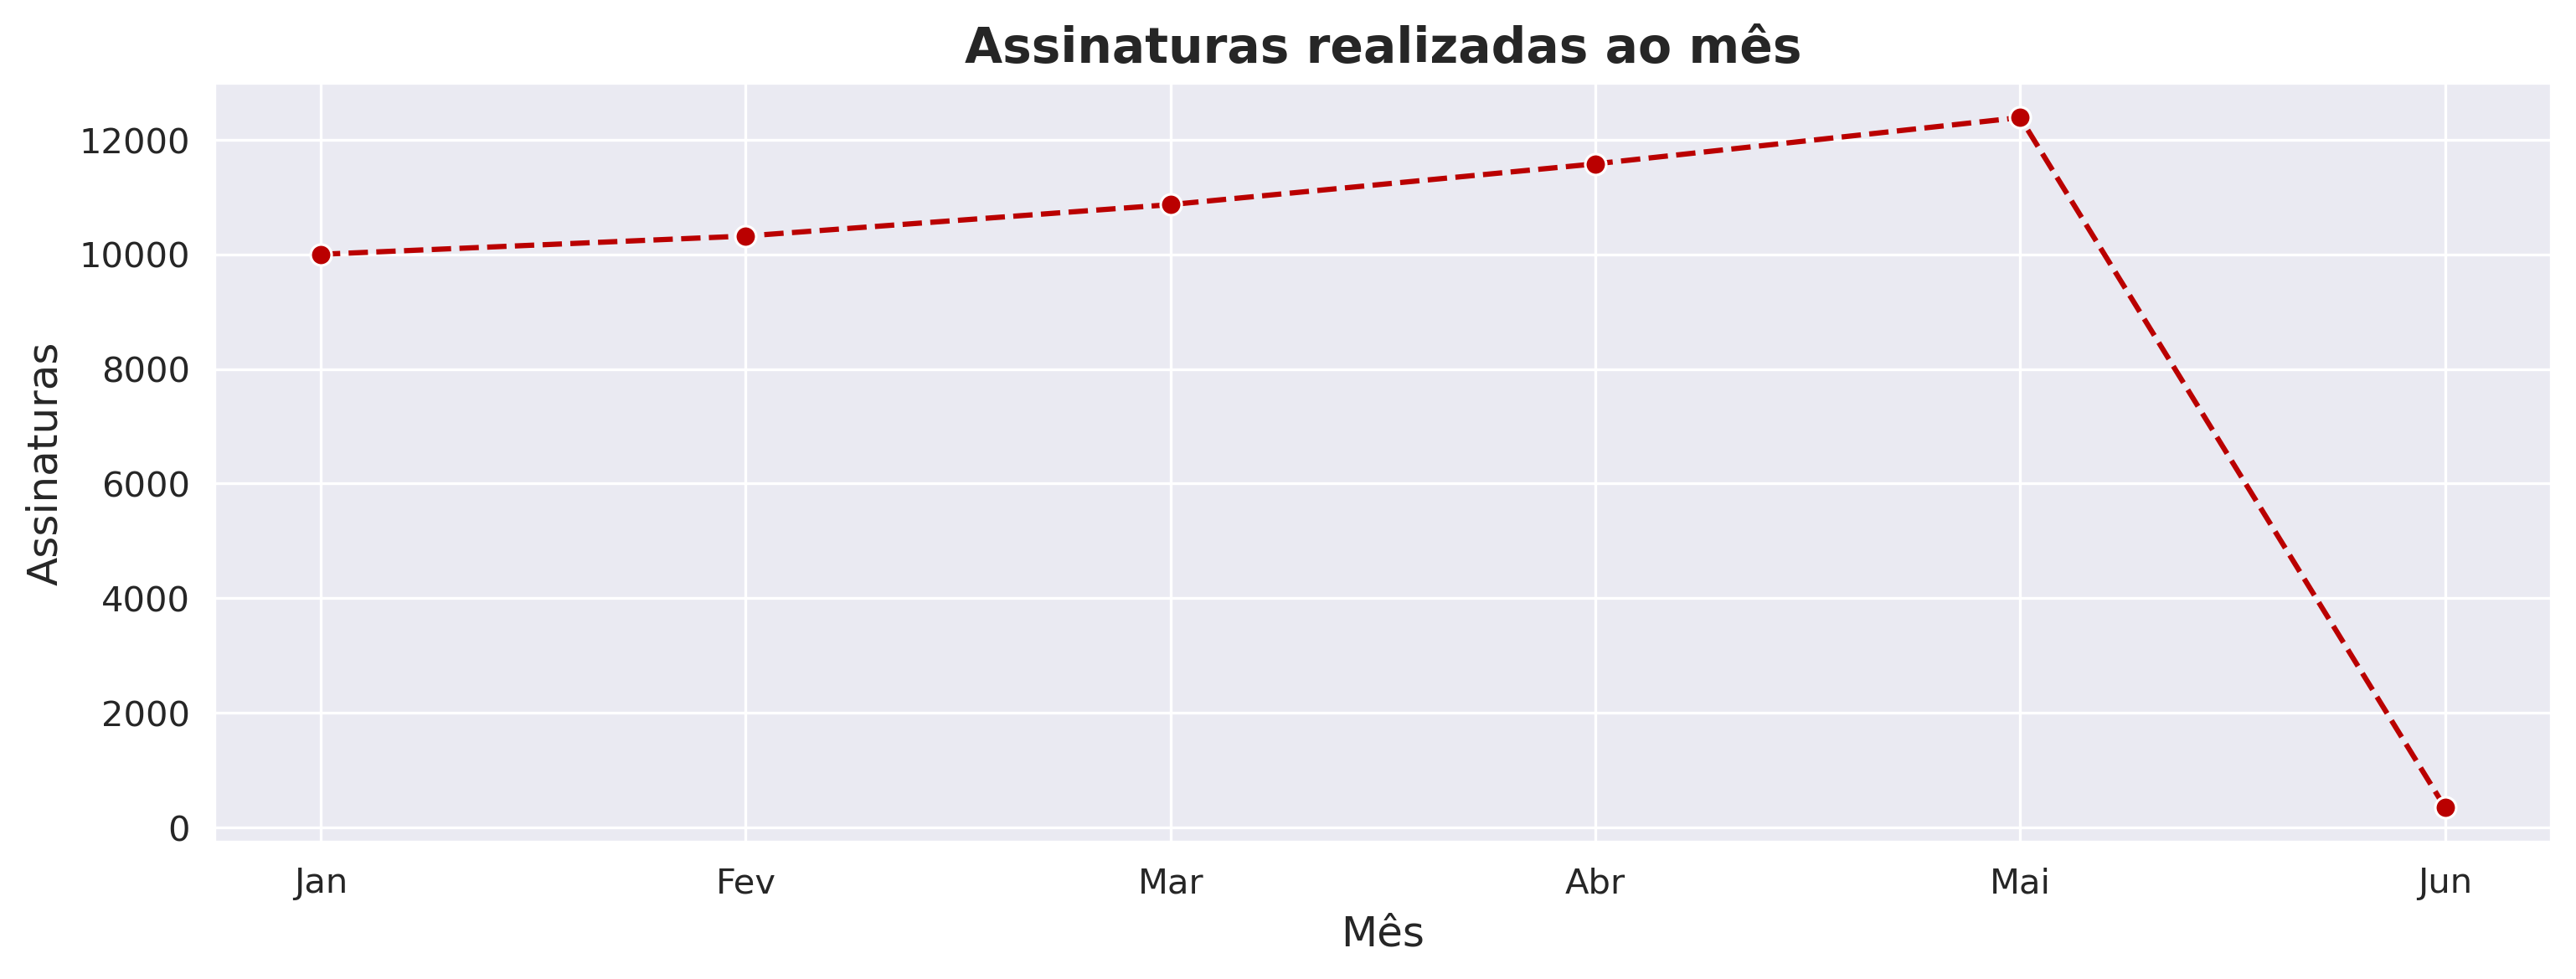

In [56]:
sns.lineplot(x         = sig_month.index,
             y         = sig_month.values, 
             palette   = 'Set1', 
             marker    = 'o', 
             color     = '#BA0000', 
             linestyle = '--')

plt.xlabel('Mês', fontsize = 12)
plt.ylabel('Assinaturas', fontsize = 12)
plt.xticks(np.arange(1,7), meses.values())
plt.title('Assinaturas realizadas ao mês', fontdict = {'fontsize':14, 'weight':'bold'})
plt.show()

O gráfico mostra que a o número de assinaturas ativas vinha crescendo até que houve uma drástica redução no mês de junho.

## Assinaturas Novas x Renovadas e acesso pelos canais de assinatura

In [57]:
# Coluna que define se assinatura é nova ou renovada
account_subscription['renew'] = account_subscription.progress_apply(lambda x: x.account_id in (account_subscription[account_subscription.start_month == (x.start_month-1)]['account_id']).values, axis = 1)

100%|████████████████████████████████████| 55502/55502 [02:21<00:00, 392.87it/s]


In [346]:
account_subscription.sort_values(by='account_id').head()

channel date_of_birth country account_id   product start_date   end_date  \
0  appstore2    1948-09-10      CN          1  standard 2020-01-06 2020-02-06   
1  appstore2    1948-09-10      CN          1  standard 2020-02-06 2020-03-06   
2  appstore2    1948-09-10      CN          1  standard 2020-03-06 2020-04-06   
3  appstore2    1948-09-10      CN          1  standard 2020-04-06 2020-05-06   
4  appstore2    1948-09-10      CN          1  standard 2020-05-06 2020-06-06   

    mrr  start_month  start_day  end_month  end_day  renew   age age_group  
0  9.99            1          6          2        2  False  74.0    Idosos  
1  9.99            2          6          3        3   True  74.0    Idosos  
2  9.99            3          6          4        4   True  74.0    Idosos  
3  9.99            4          6          5        5   True  74.0    Idosos  
4  9.99            5          6          6        6   True  74.0    Idosos

In [59]:
group_channels = account_subscription.groupby(['start_month','channel']).count()['product'].reset_index()

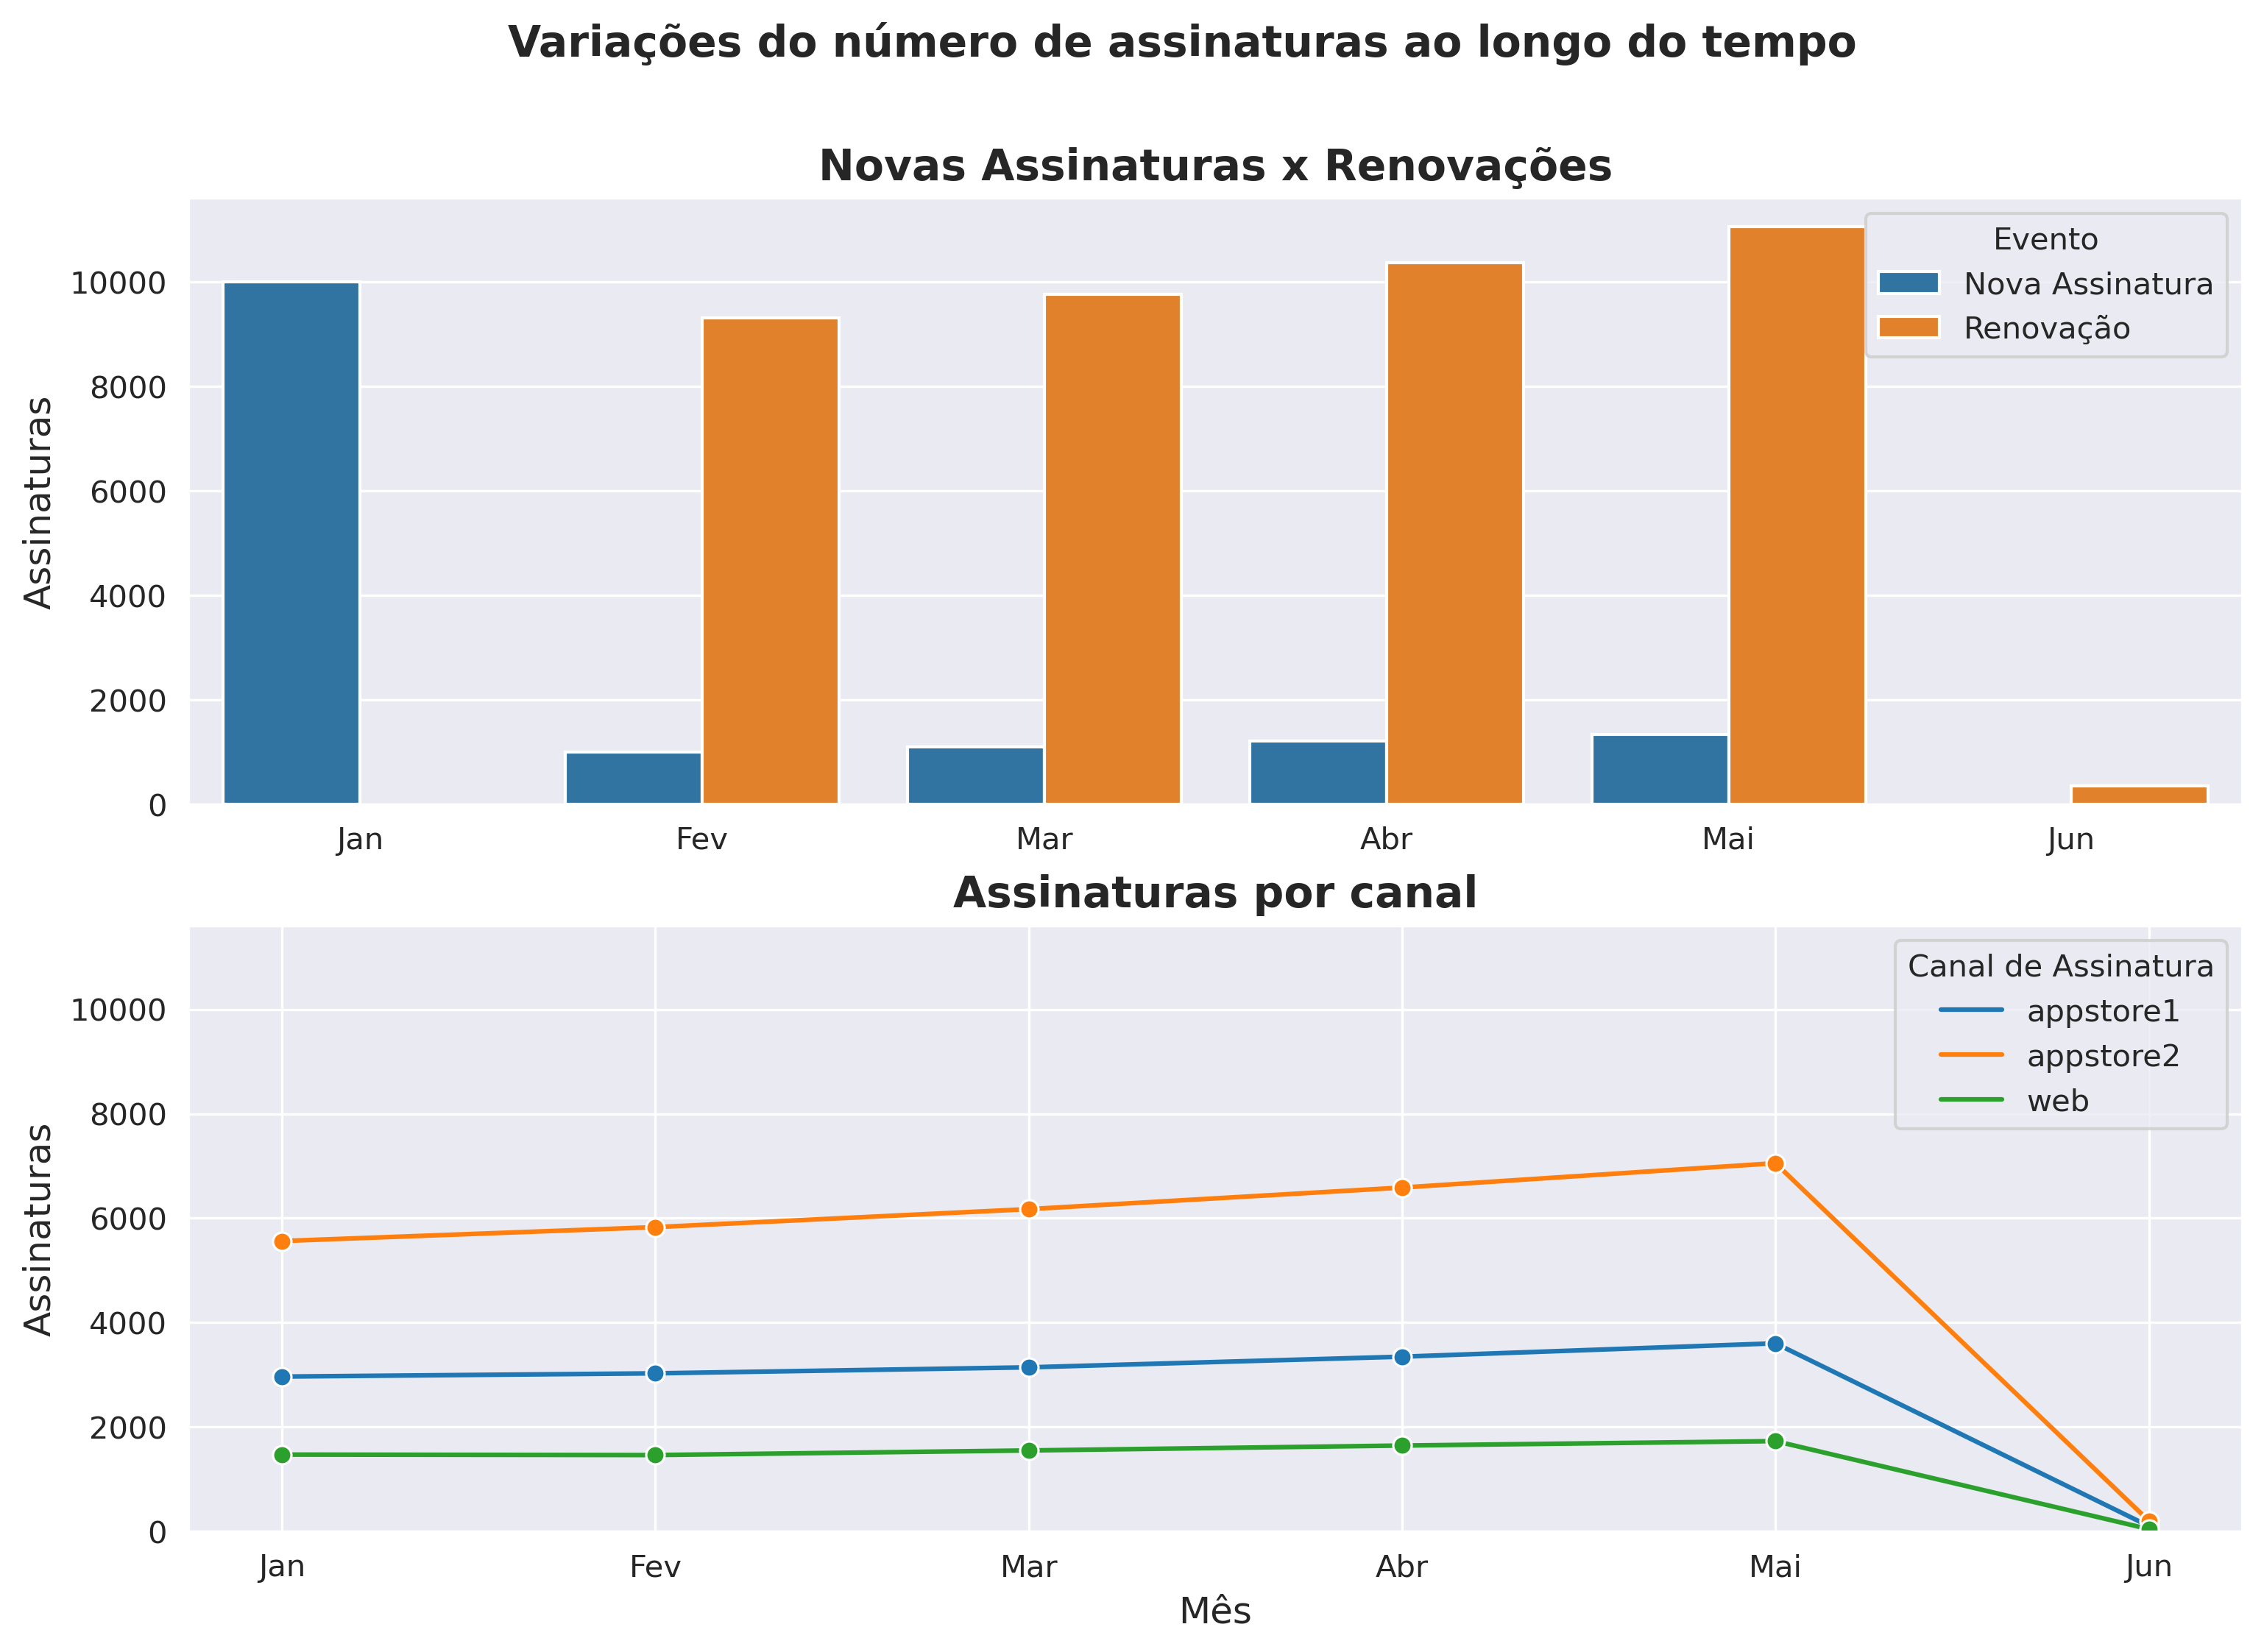

In [60]:
f, ax = plt.subplots(nrows = 2, figsize=(12,8),sharex = False, sharey = True)

sns.countplot(data = account_subscription, 
              x    = 'start_month', 
              hue  = 'renew', 
              ax   = ax[0])

ax[0].legend(labels     = ['Nova Assinatura','Renovação'], title = 'Evento')
ax[0].set_xticks(ticks  = np.arange(0,6), labels=['Jan','Fev','Mar','Abr','Mai','Jun'])
ax[0].set_xlabel('')
ax[0].set_ylabel('Assinaturas', fontsize = 12)
ax[0].set_title('Novas Assinaturas x Renovações',fontsize = 14, weight = 'bold')



sns.lineplot(data   = account_subscription.groupby(['start_month','channel']).count()['product'].reset_index(), 
             x      ='start_month', 
             y      ='product', 
             hue    = 'channel', 
             marker = 'o', 
             ax     = ax[1])

plt.title('Assinaturas por canal', weight = 'bold', fontsize = 14)
ax[1].set_xlabel('Mês', fontsize = 12)
ax[1].set_ylabel('Assinaturas', fontsize = 12)
ax[1].set_xticks(np.arange(1,7), meses.values())
ax[1].legend(title = 'Canal de Assinatura')

plt.suptitle('Variações do número de assinaturas ao longo do tempo', weight = 'bold', fontsize = 14)
plt.show()

* Como não temos dados anteriores, consideramos as assinaturas do mês de Janeiro como novas assinaturas. É possível constatar que a a maioria das assinaturas ativas vem de renovações de usuários e uma pequena fração incremental de novas assinaturas a cada mês. No último mês, no entanto, não houveram novas assinaturas e a taxa de renovação foi muito abaixo do que vinha sendo observado.

* O segundo gráfico mostra que o canal mais utilizado no momento das assinaturas é a appstore2 seguido pela appstore1 e a web com o menor apelo. O destaque maior para a appstore2 pode indicar um perfil consistente de consumo para o tipo de cliente que se torna-se assinante.

## Avaliação de Faixa Etária

In [61]:
account_subscription['age'] = account_subscription.date_of_birth.progress_apply(lambda x: datetime.date.today() - x.date())

100%|█████████████████████████████████| 55502/55502 [00:00<00:00, 138101.22it/s]


In [62]:
account_subscription['age'] = round(account_subscription.age.dt.days/365,0)

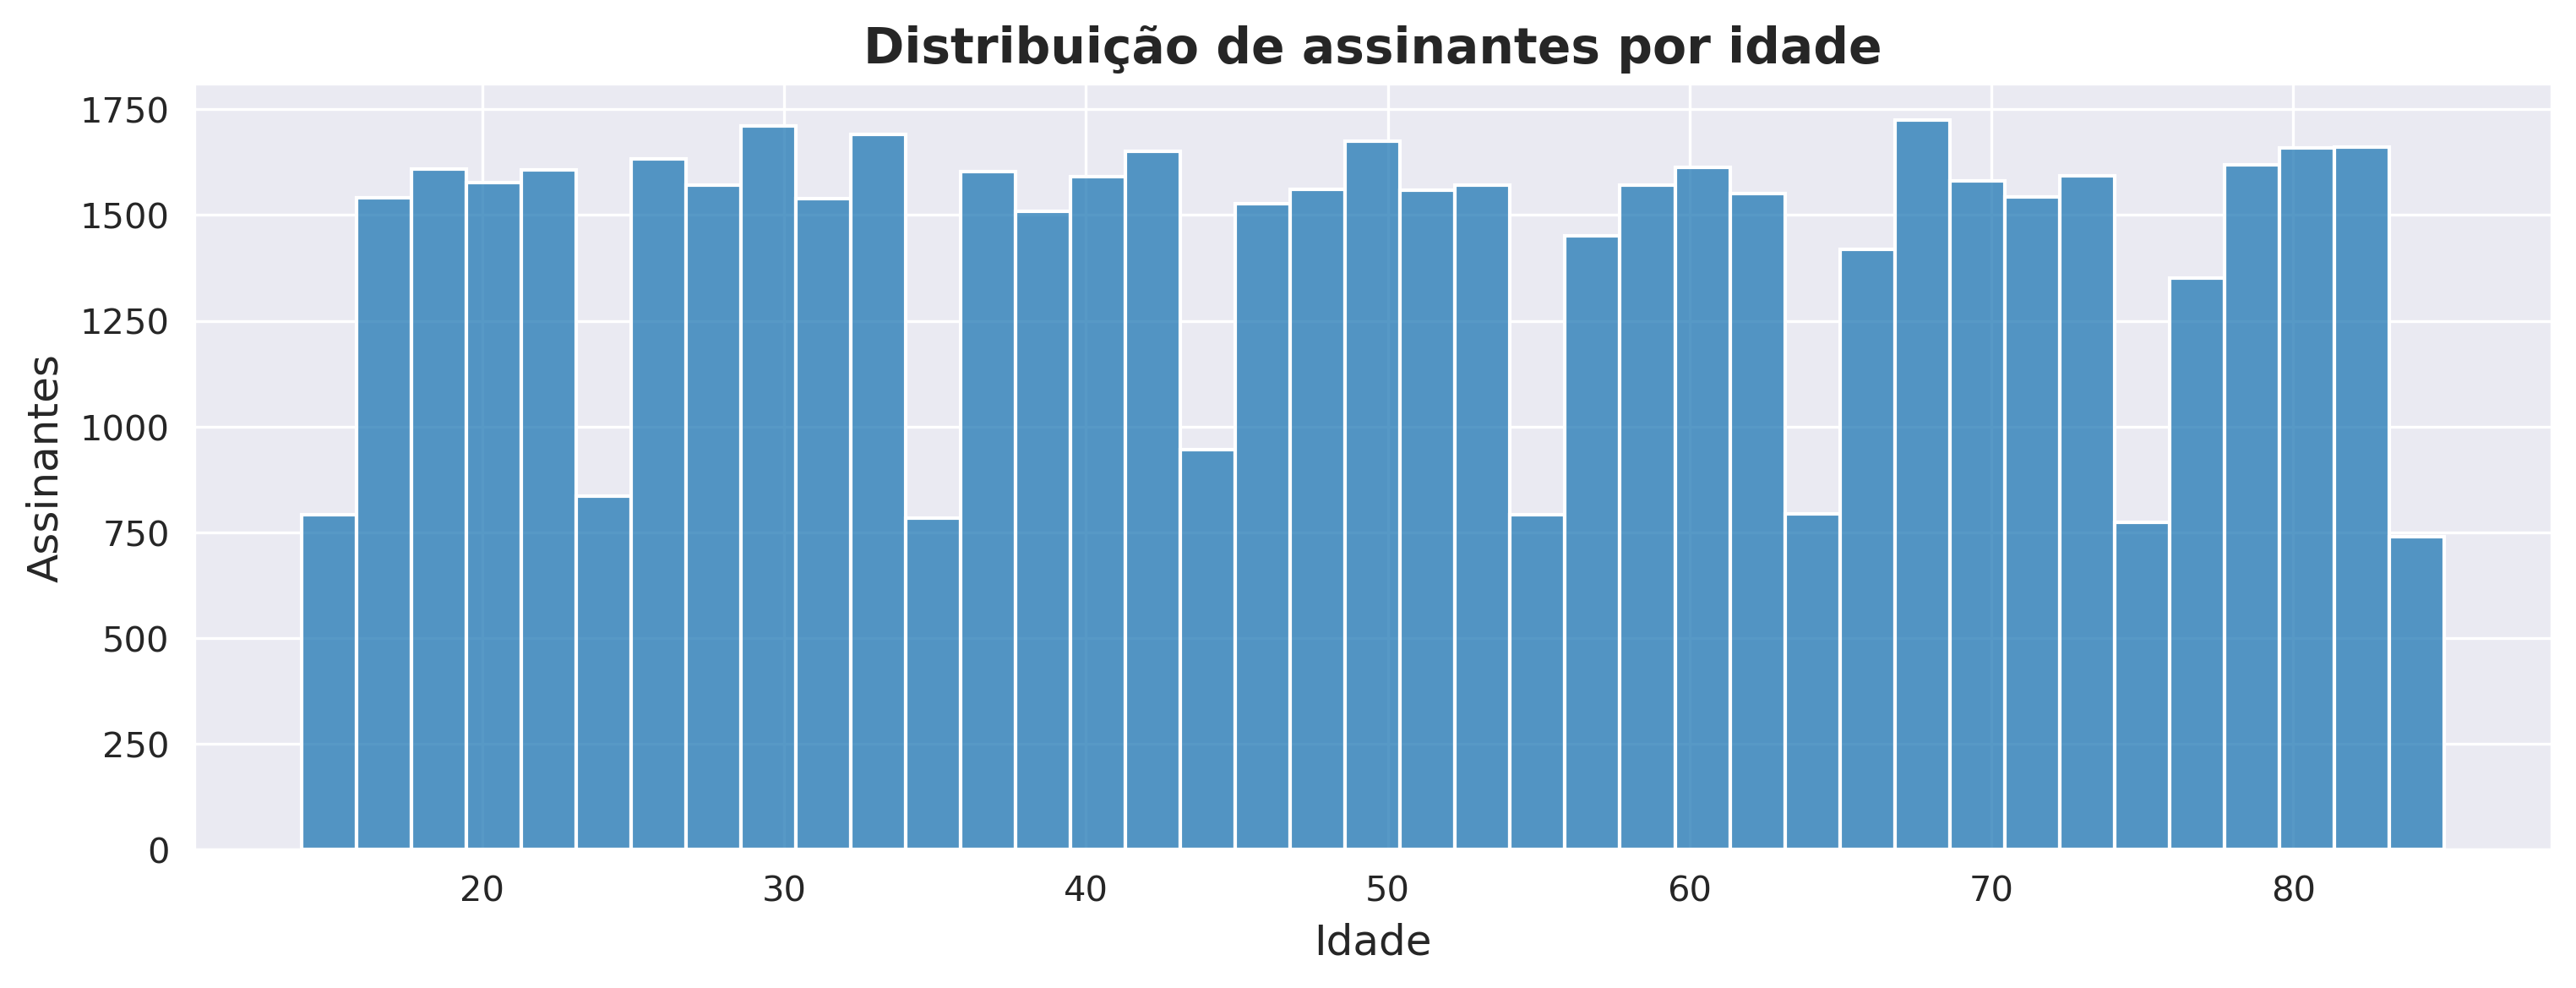

In [344]:
sns.histplot(account_subscription.age)
plt.title('Distribuição de assinantes por idade', fontdict = {'fontsize':14, 'weight':'bold'})
plt.xlabel('Idade', fontsize = 12)
plt.ylabel('Assinantes', fontsize = 12)
plt.show()

O gráfico de idades mostra que há uma distribuição com váris picos em diferentes faixas de idade. Para facilitar a análise, será feito o agrupamento das idades em faixas etárias.

Considerando:
   * Até 19 anos: Adolescentes e jovens
   * Entre 20 e 39 anos: Jovens adultos
   * Entre 40 e 59 anos: Adultos
   * Entre 60 e 79: Idosos
   * Acima de 80: Idosos+

In [64]:
account_subscription['age_group'] = pd.cut(account_subscription.age, bins=[0,19,39,59,79, 100], labels=['Adolescentes e Jovens','Jovens Adultos','Adultos','Idosos', 'Idosos+'])

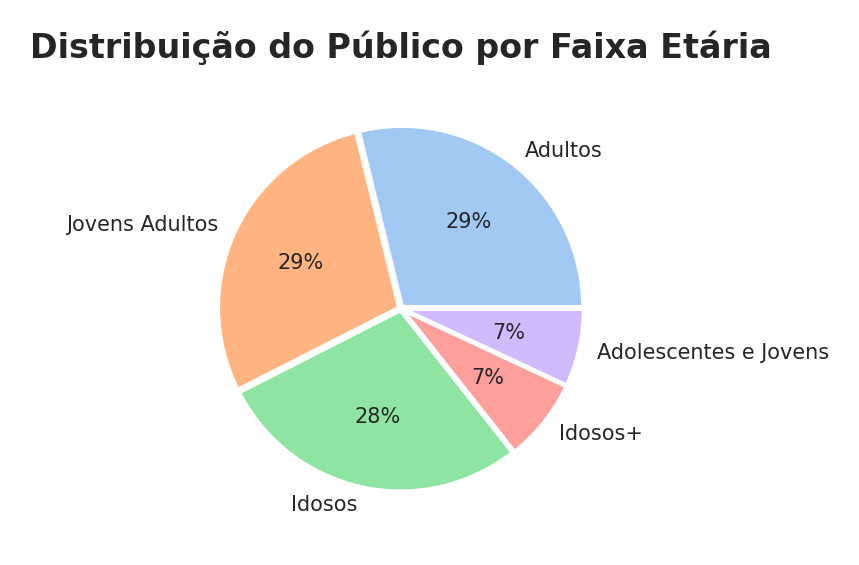

In [65]:
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize = (4,2))
explode = [0.01, 0.01, 0.01, 0.01, 0.01]

plt.pie(account_subscription.drop_duplicates(['account_id'])['age_group'].value_counts().values, 
        labels    = account_subscription.drop_duplicates(['account_id'])['age_group'].value_counts().index, 
        colors    = colors, 
        autopct   ='%.0f%%', 
        explode   = explode,
        textprops =  {'fontsize': 5})

plt.title('Distribuição do Público por Faixa Etária',fontsize= 8, weight = 'bold')
plt.show()

Principais públicos dividem-se igualmente entre jovens adultos, adultos e idosos, chegando a somar aprox. 85% do público total. 

## Período total de assinatura por conta

In [66]:
ltv = subscription.groupby('account_id').agg({'start_date':'min', 'end_date':'max'})

In [67]:
ltv['period'] = (ltv.progress_apply(lambda x: int((x.end_date - x.start_date).days/30), axis = 1)).astype('category')

100%|██████████████████████████████████| 14641/14641 [00:01<00:00, 10939.74it/s]


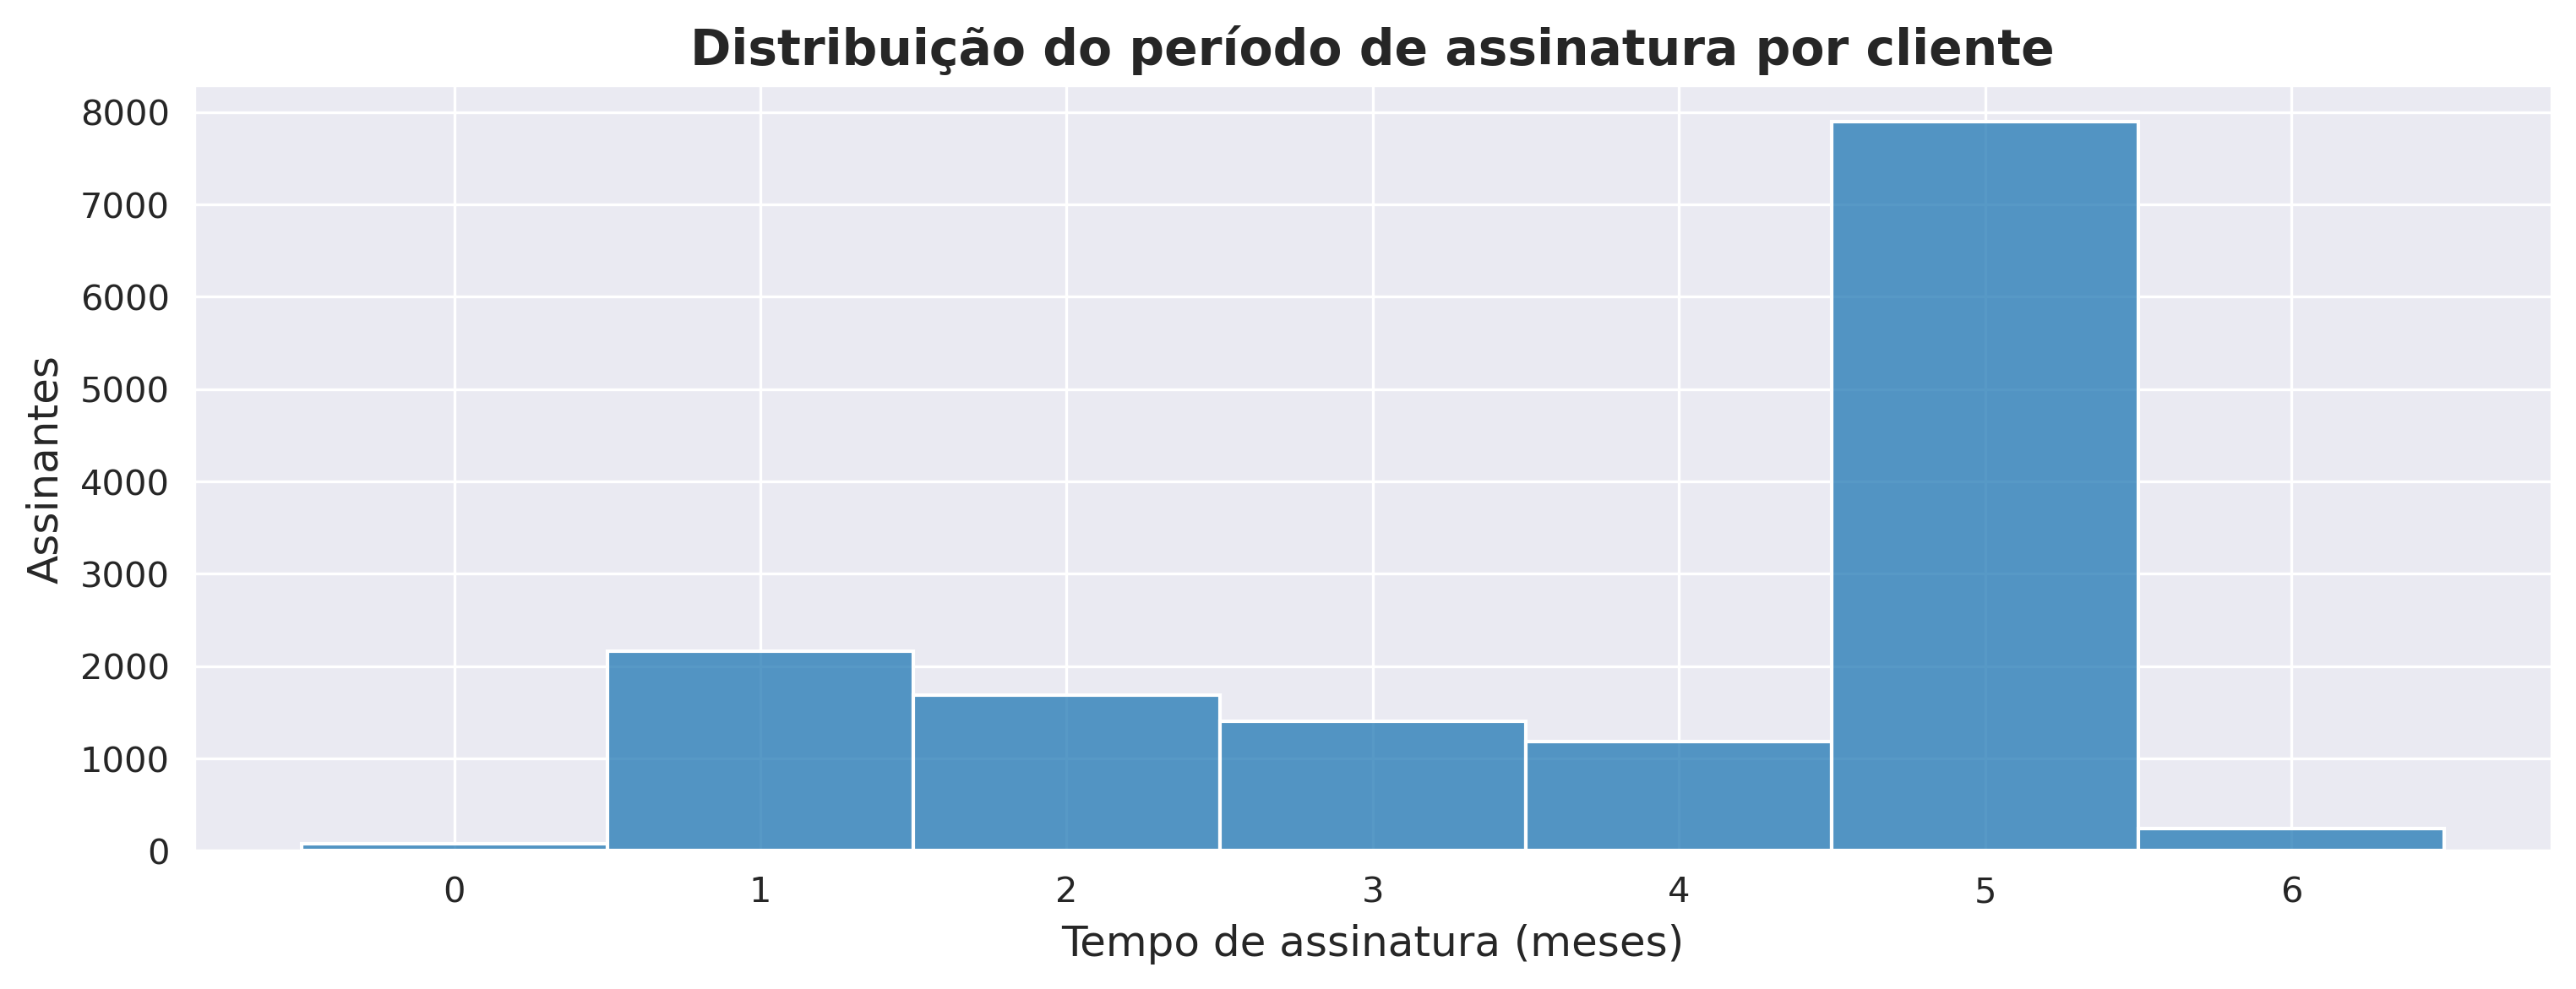

In [345]:
sns.histplot(data=ltv, x='period')
plt.title('Distribuição do período de assinatura por cliente', fontdict = {'fontsize':14, 'weight':'bold'})
plt.xlabel('Tempo de assinatura (meses)', fontsize = 12)
plt.ylabel('Assinantes', fontsize = 12)
plt.show()

In [69]:
ltv['age_group'] = (ltv.index.map(dict(zip(account_subscription.account_id,account_subscription.age_group)))).astype('category')

In [70]:
age_hue_order = ['Adolescentes e Jovens','Jovens Adultos','Adultos','Idosos','Idosos+']

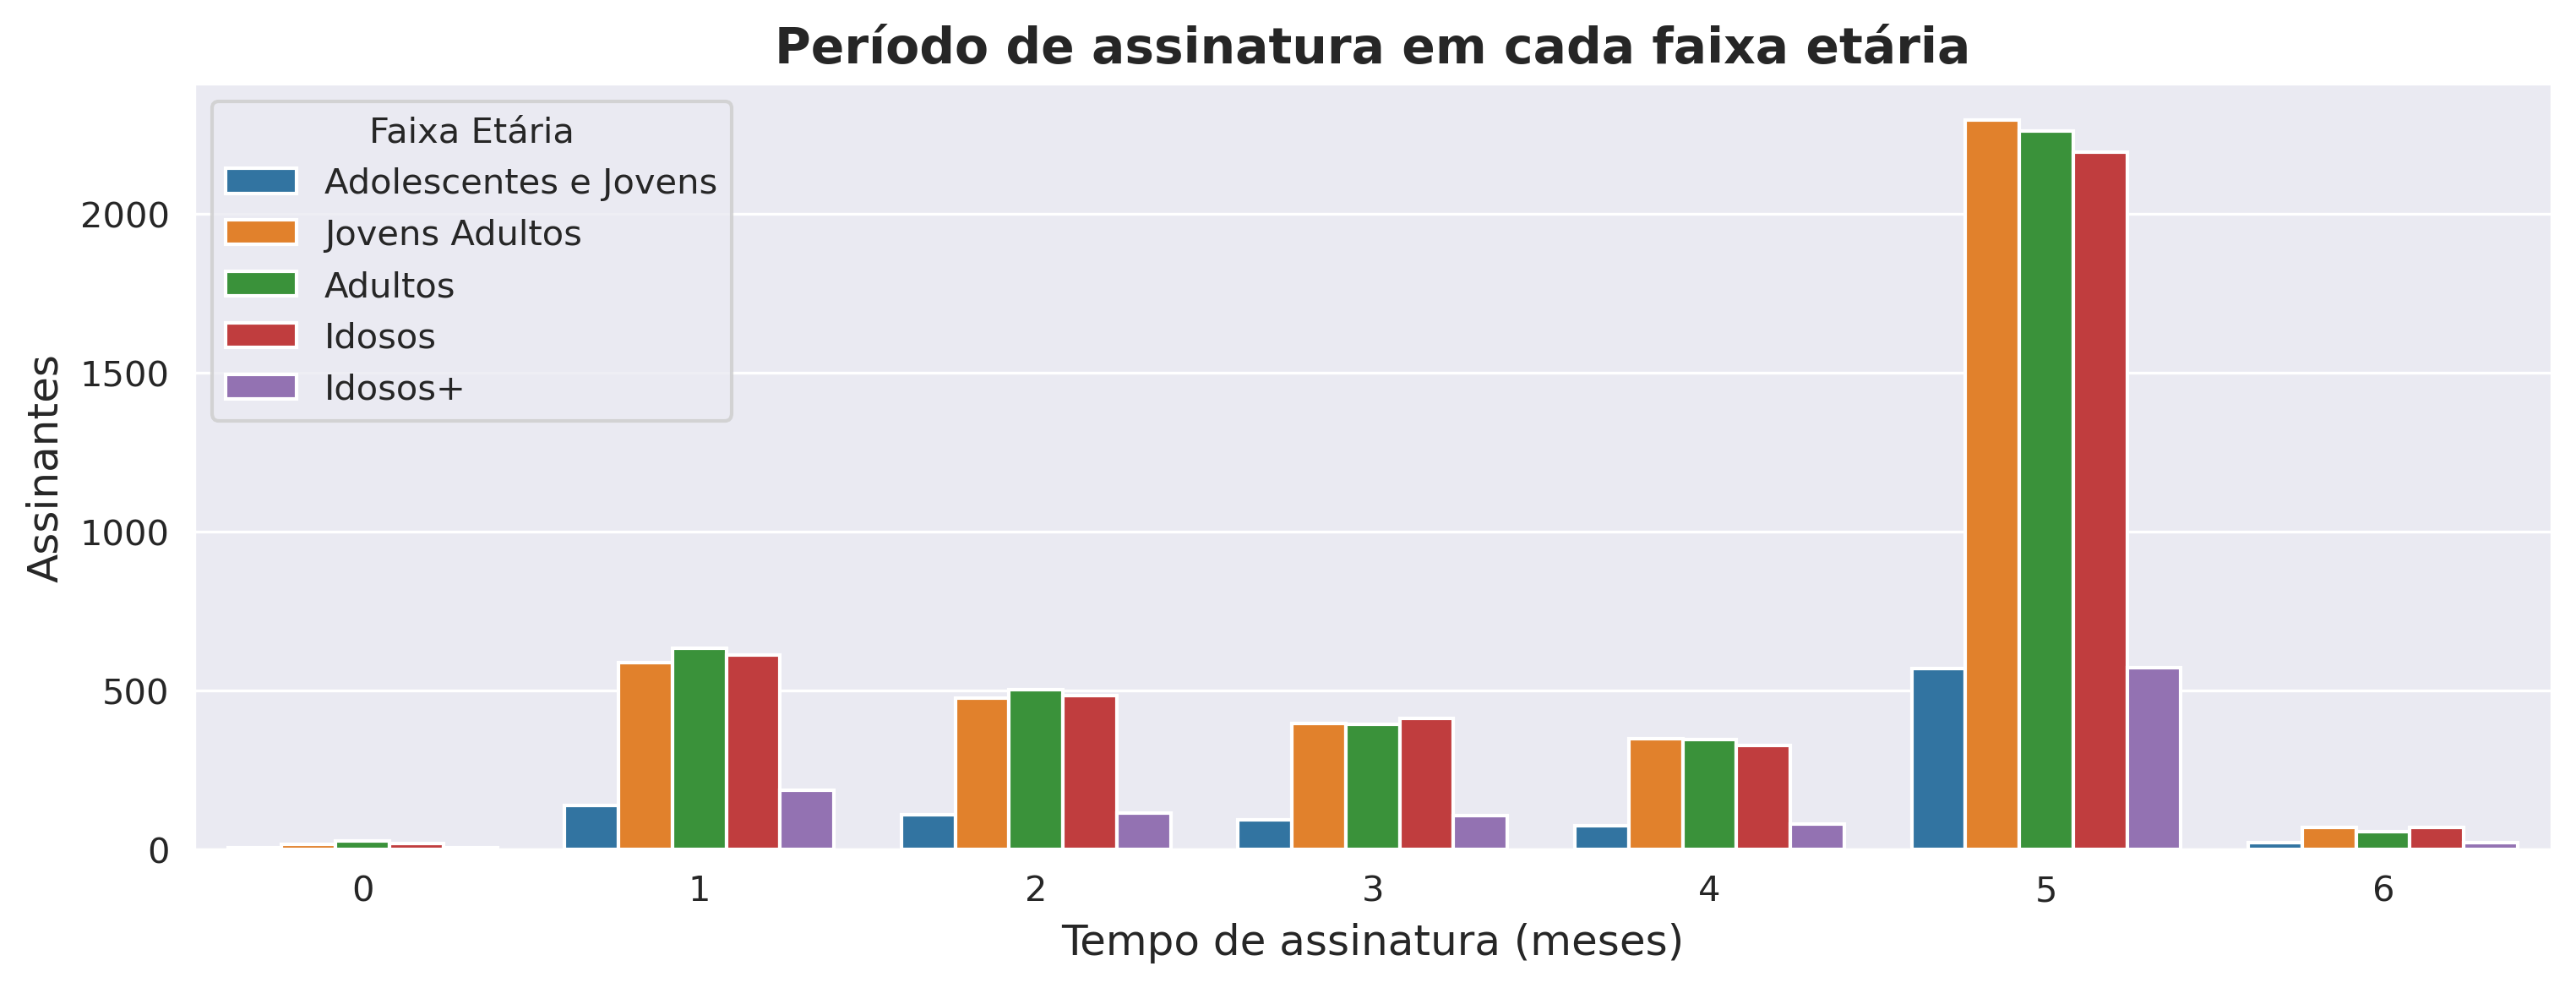

In [71]:
sns.countplot(data      = ltv, 
              x         = 'period', 
              hue       = 'age_group',
              hue_order = age_hue_order)

plt.xlabel('Tempo de assinatura (meses)', fontsize=12)
plt.ylabel('Assinantes', fontsize=12)
plt.title('Período de assinatura em cada faixa etária', fontdict = {'fontsize':14, 'weight':'bold'})
plt.legend(title = 'Faixa Etária')
plt.show()

Não parece haver variação significativa na proporção de assinantes por grupo etário considerando todos os períodos de assiantura.

In [72]:
ltv_event = ltv.merge(event, how='right', 
                      left_index = True, 
                      right_on = 'account_id')

## Tipos de interações por faixa etária

In [73]:
interaction_hue_order = [2,6,0,3,7,4,1,5]
interaction_legend = ['like','message','post','adview','reply','dislike','newfriend','unfriend']

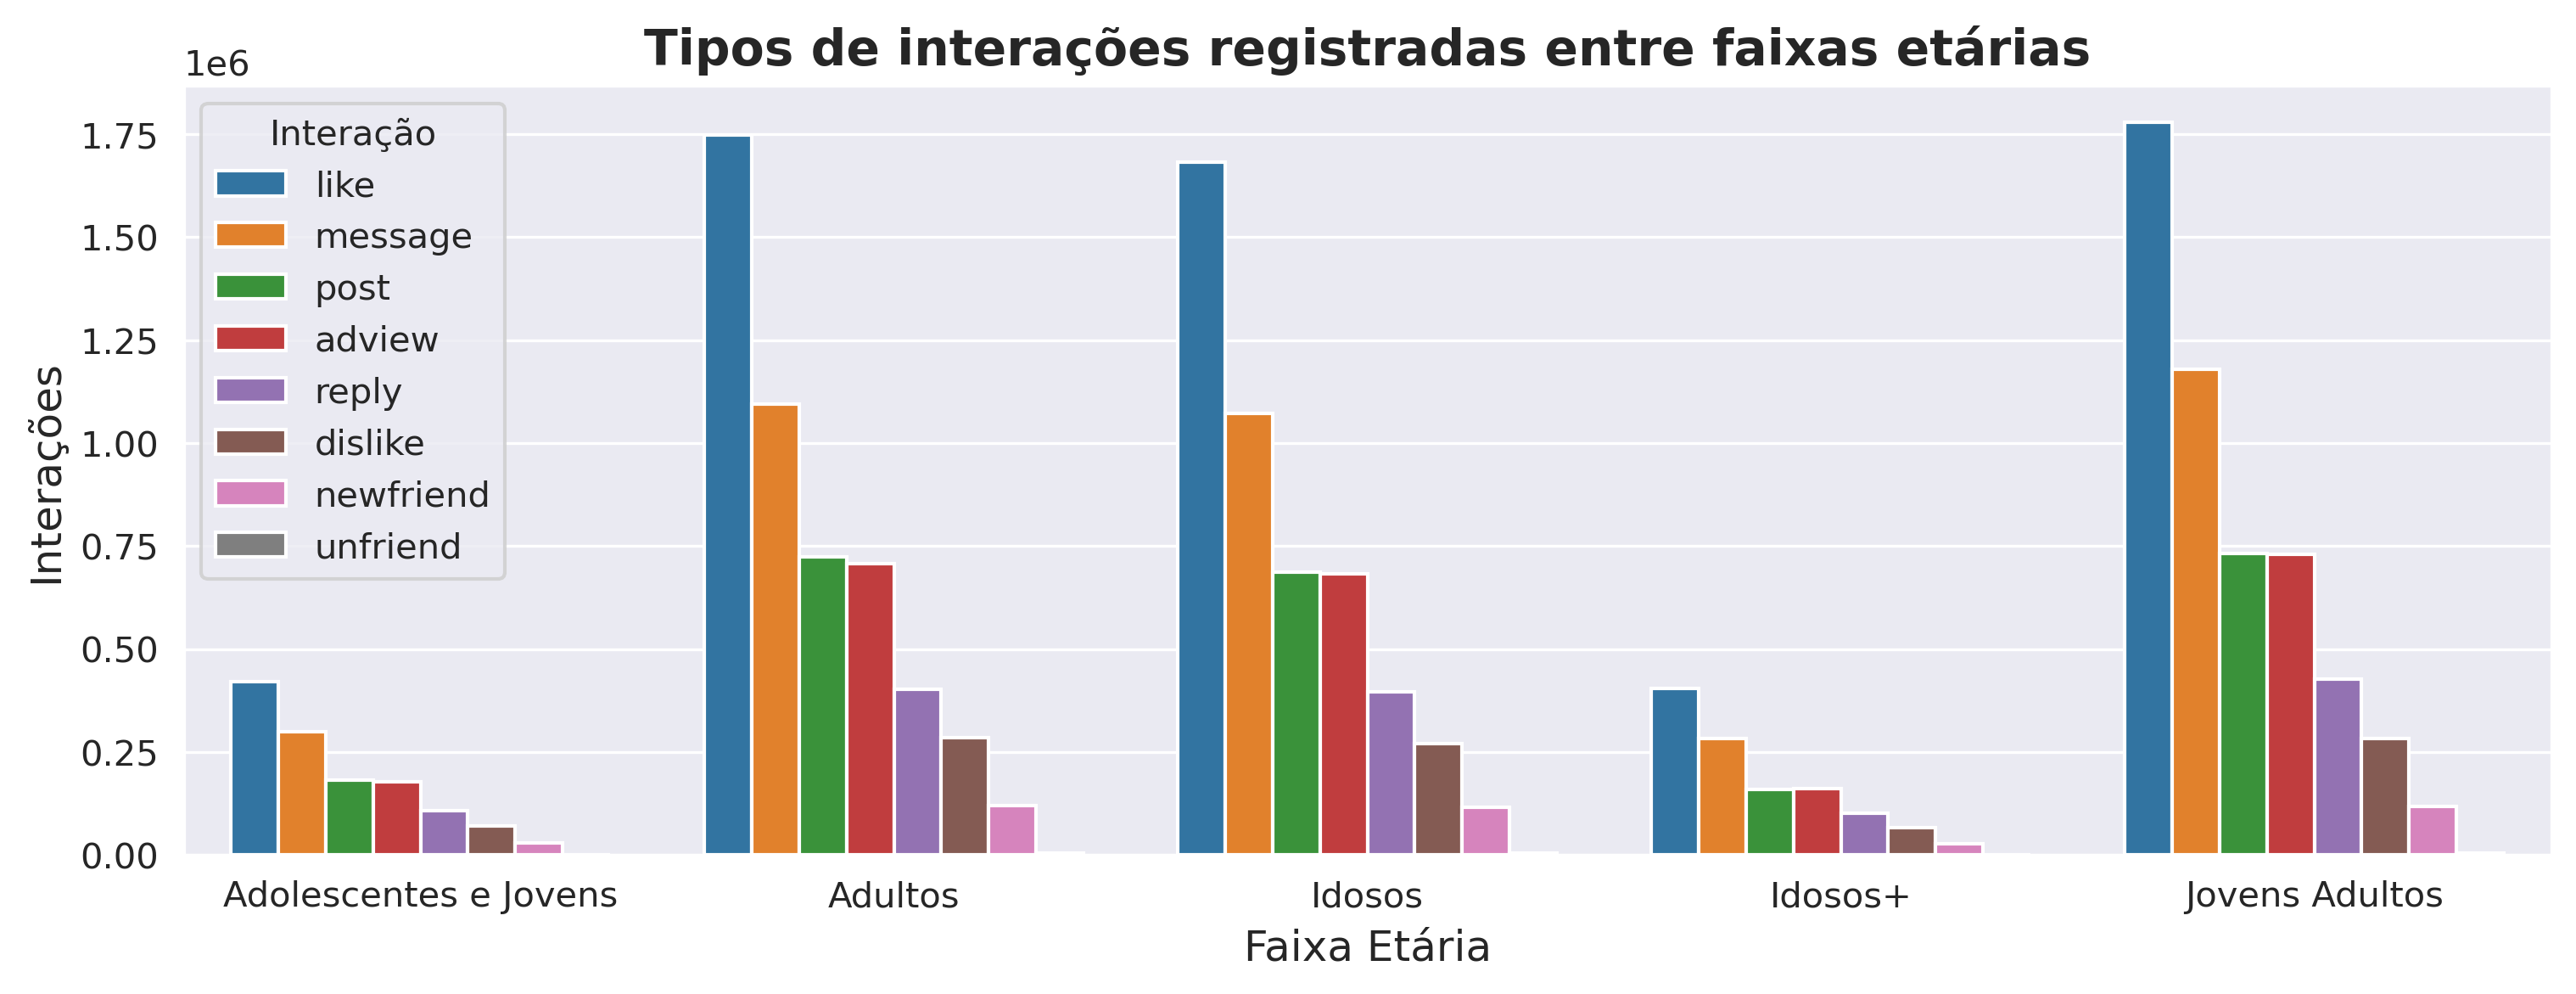

In [74]:
sns.countplot(data      = ltv_event[['age_group','event_type_id']], 
              x         = 'age_group',  
              hue       = 'event_type_id',
              hue_order = interaction_hue_order)

plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Interações', fontsize=12)
plt.title('Tipos de interações registradas entre faixas etárias', fontdict = {'fontsize':14, 'weight':'bold'})
plt.legend(interaction_legend, title = 'Interação')
plt.show()

## Avaliação de usuários por país

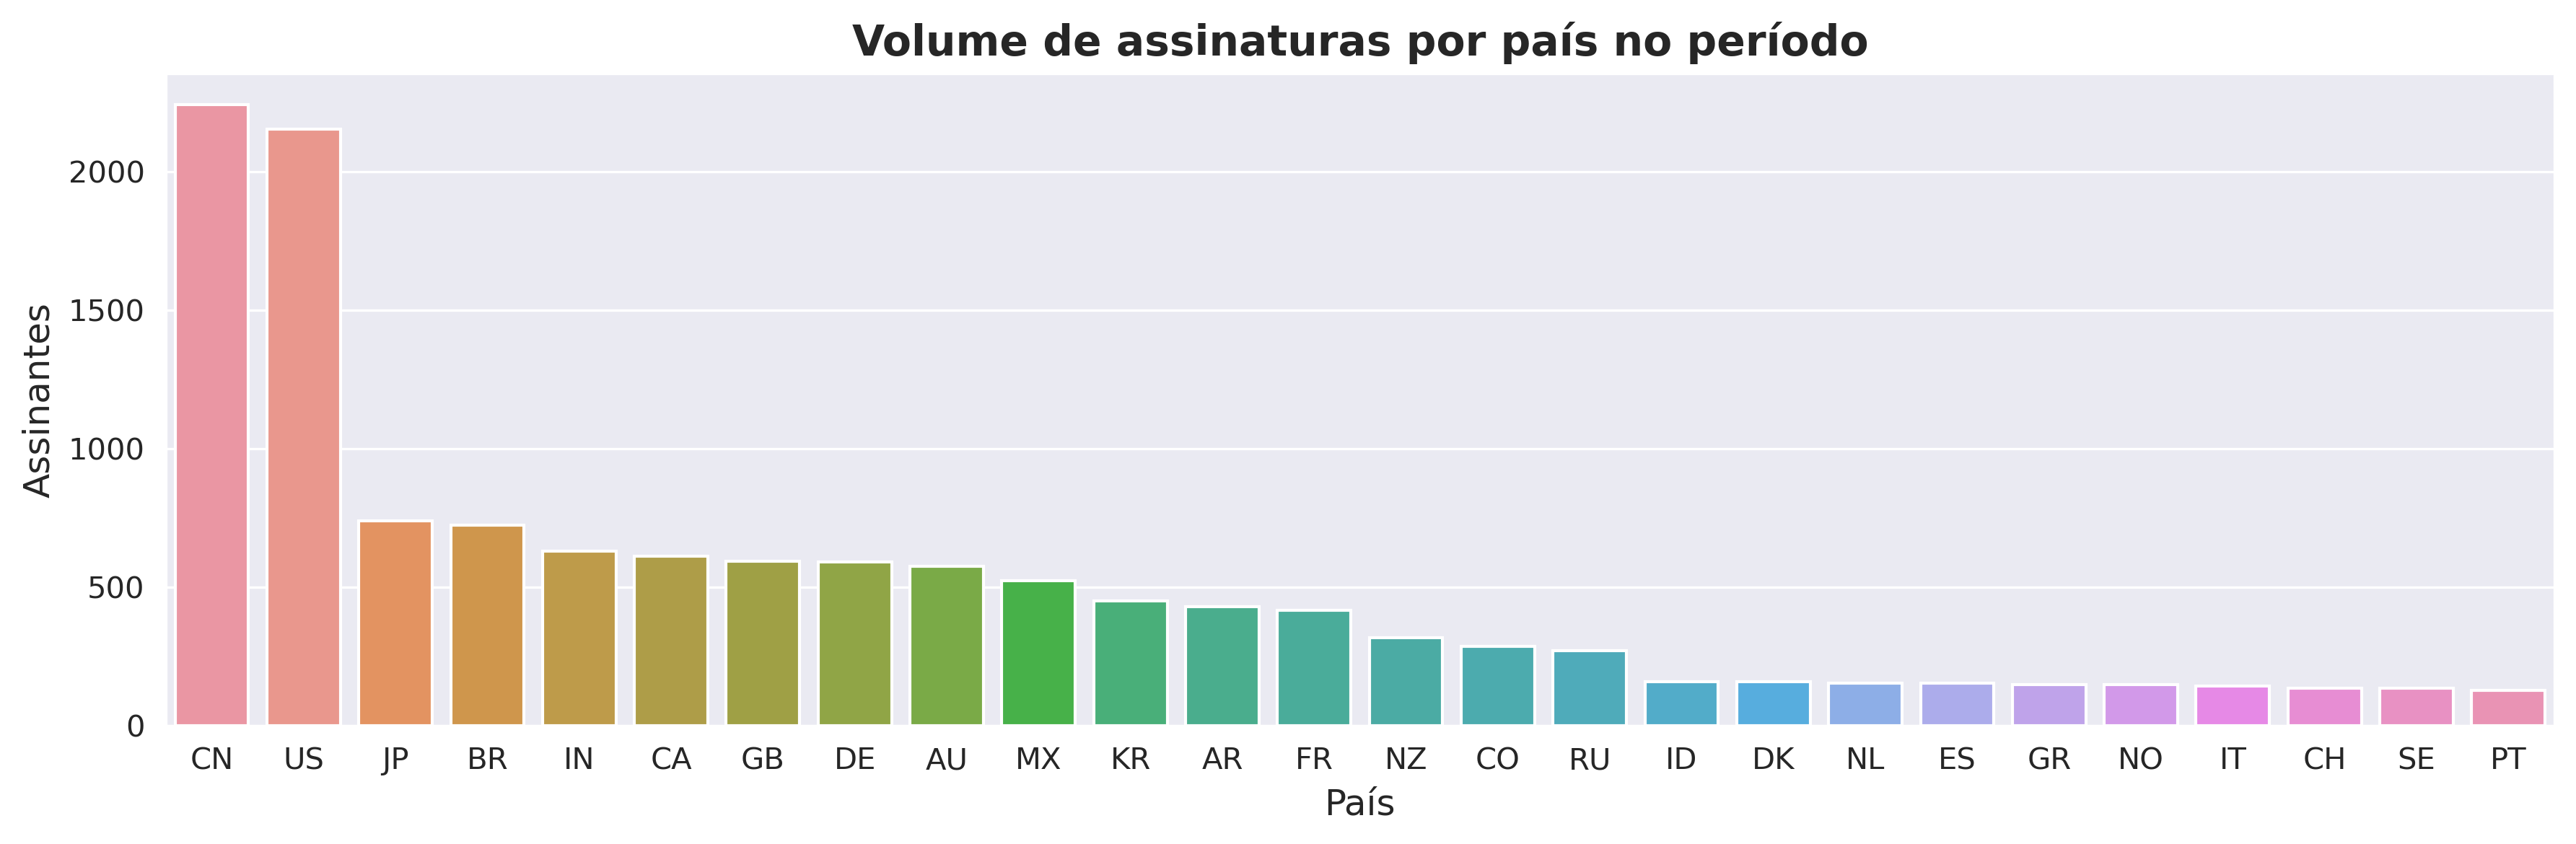

In [343]:
temp = account.country.value_counts().sort_values(ascending = False)

sns.barplot(x     = temp.index, 
            y     = temp, 
            order = temp.index)

plt.xlabel('País', fontsize=12)
plt.ylabel('Assinantes', fontsize=12)
plt.title('Volume de assinaturas por país no período', fontdict = {'fontsize':14, 'weight':'bold'})
plt.tight_layout()
plt.show()

* China e Estados Unidados constituem a maior fração do público assinante do serviço. 
* Vamos avaliar como o volume de assinaturas variou para cada um desses países.

In [76]:
grouped_countries = [account_subscription[account_subscription.country==ctr] for ctr in account.country.unique() if ctr is not np.nan]

In [77]:
#Cores para a as séries temporais de cada país no gráfico abaixo

colors = ['#800000', '#FF4500','#CD5C5C','#FFD700', '#B8860B', 
          '#EEE8AA', '#9ACD32','#7CFC00','#006400','#8B4513', 
          '#000000', '#8FBC8F', '#00FA9A','#2E8B57','#2F4F4F',
         '#008080','#00FFFF','#AFEEEE','#4682B4','#191970',
         '#0000FF','#8A2BE2','#4B0082', '#8B008B','#FF00FF','#F5DEB3']

26it [00:01, 21.20it/s]


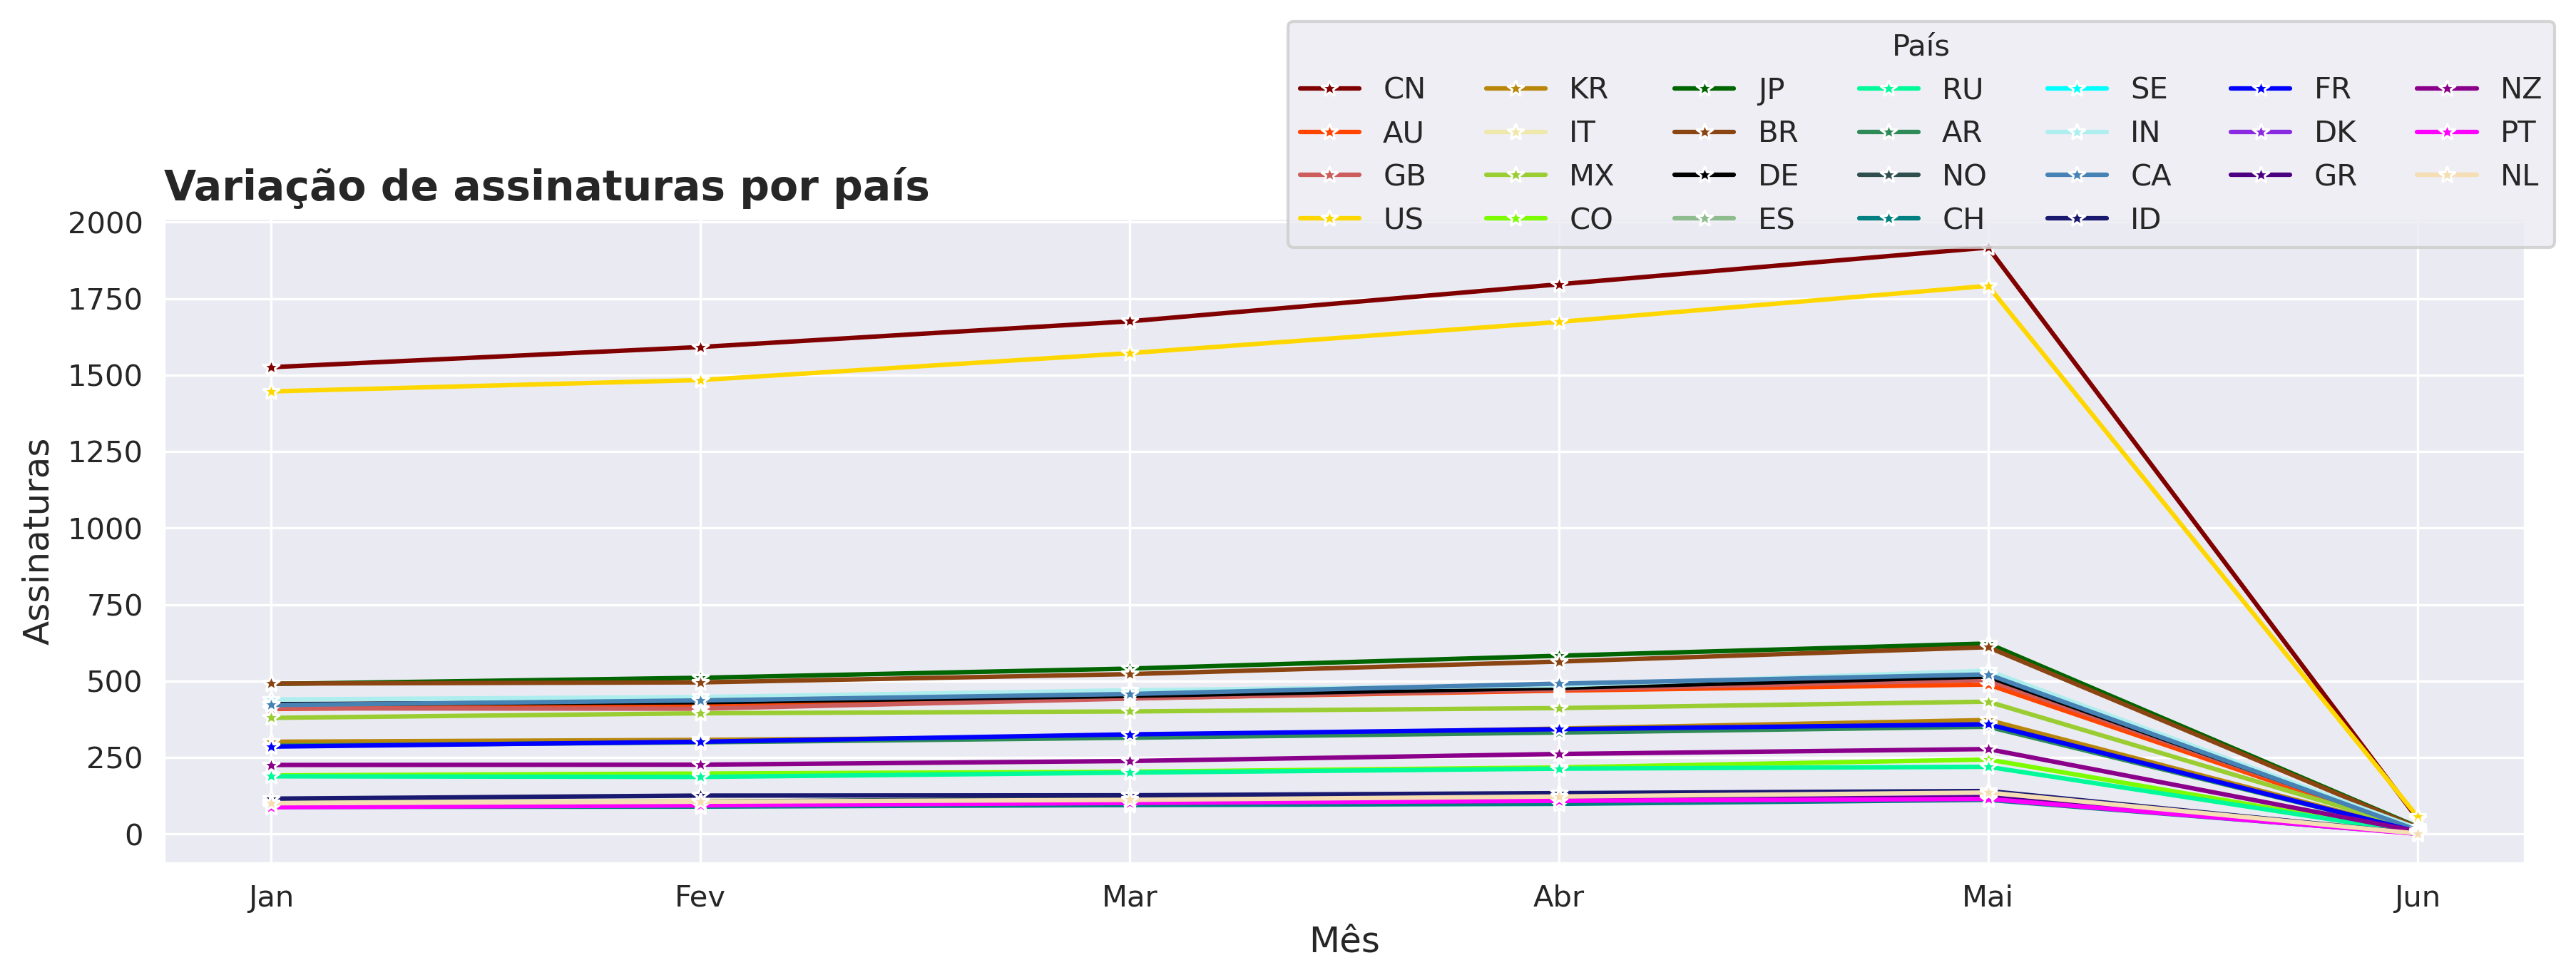

In [78]:
for n, country in tqdm(enumerate(grouped_countries)):
    cur_country = country.groupby('start_month').count()['country']
    
    ax = sns.lineplot(x         = cur_country.index, 
                      y         = cur_country, 
                      marker    = '*', 
                      label     = country.country.iloc[0], 
                      color     = colors[n], 
                      linestyle = '-')
    
handles, labels = ax.axes.get_legend_handles_labels()
ax.legend_.remove()
ax.figure.legend(handles, labels, ncol=7, loc='upper left', 
                bbox_to_anchor=(0.5, 1.15), frameon=True, title = 'País')

ax.set_xlabel('Mês', fontsize = 12)
ax.set_ylabel('Assinaturas', fontsize = 12)
ax.set_xticks(np.arange(1,7), labels = ['Jan','Fev','Mar','Abr','Mai','Jun'])
plt.title('Variação de assinaturas por país', loc = 'left', fontdict = {'fontsize':14, 'weight':'bold'})
plt.tight_layout()
plt.show()

Todos os países seguiram a mesma tendência no mês de junho e não renovaram suas assinaturas para o próximo mês, o que indica que o churn da plataforma é um fenômeno mundial.

## Avaliação de assinaturas por dia

In [79]:
event_ts = event.set_index('event_time').resample('D').count()

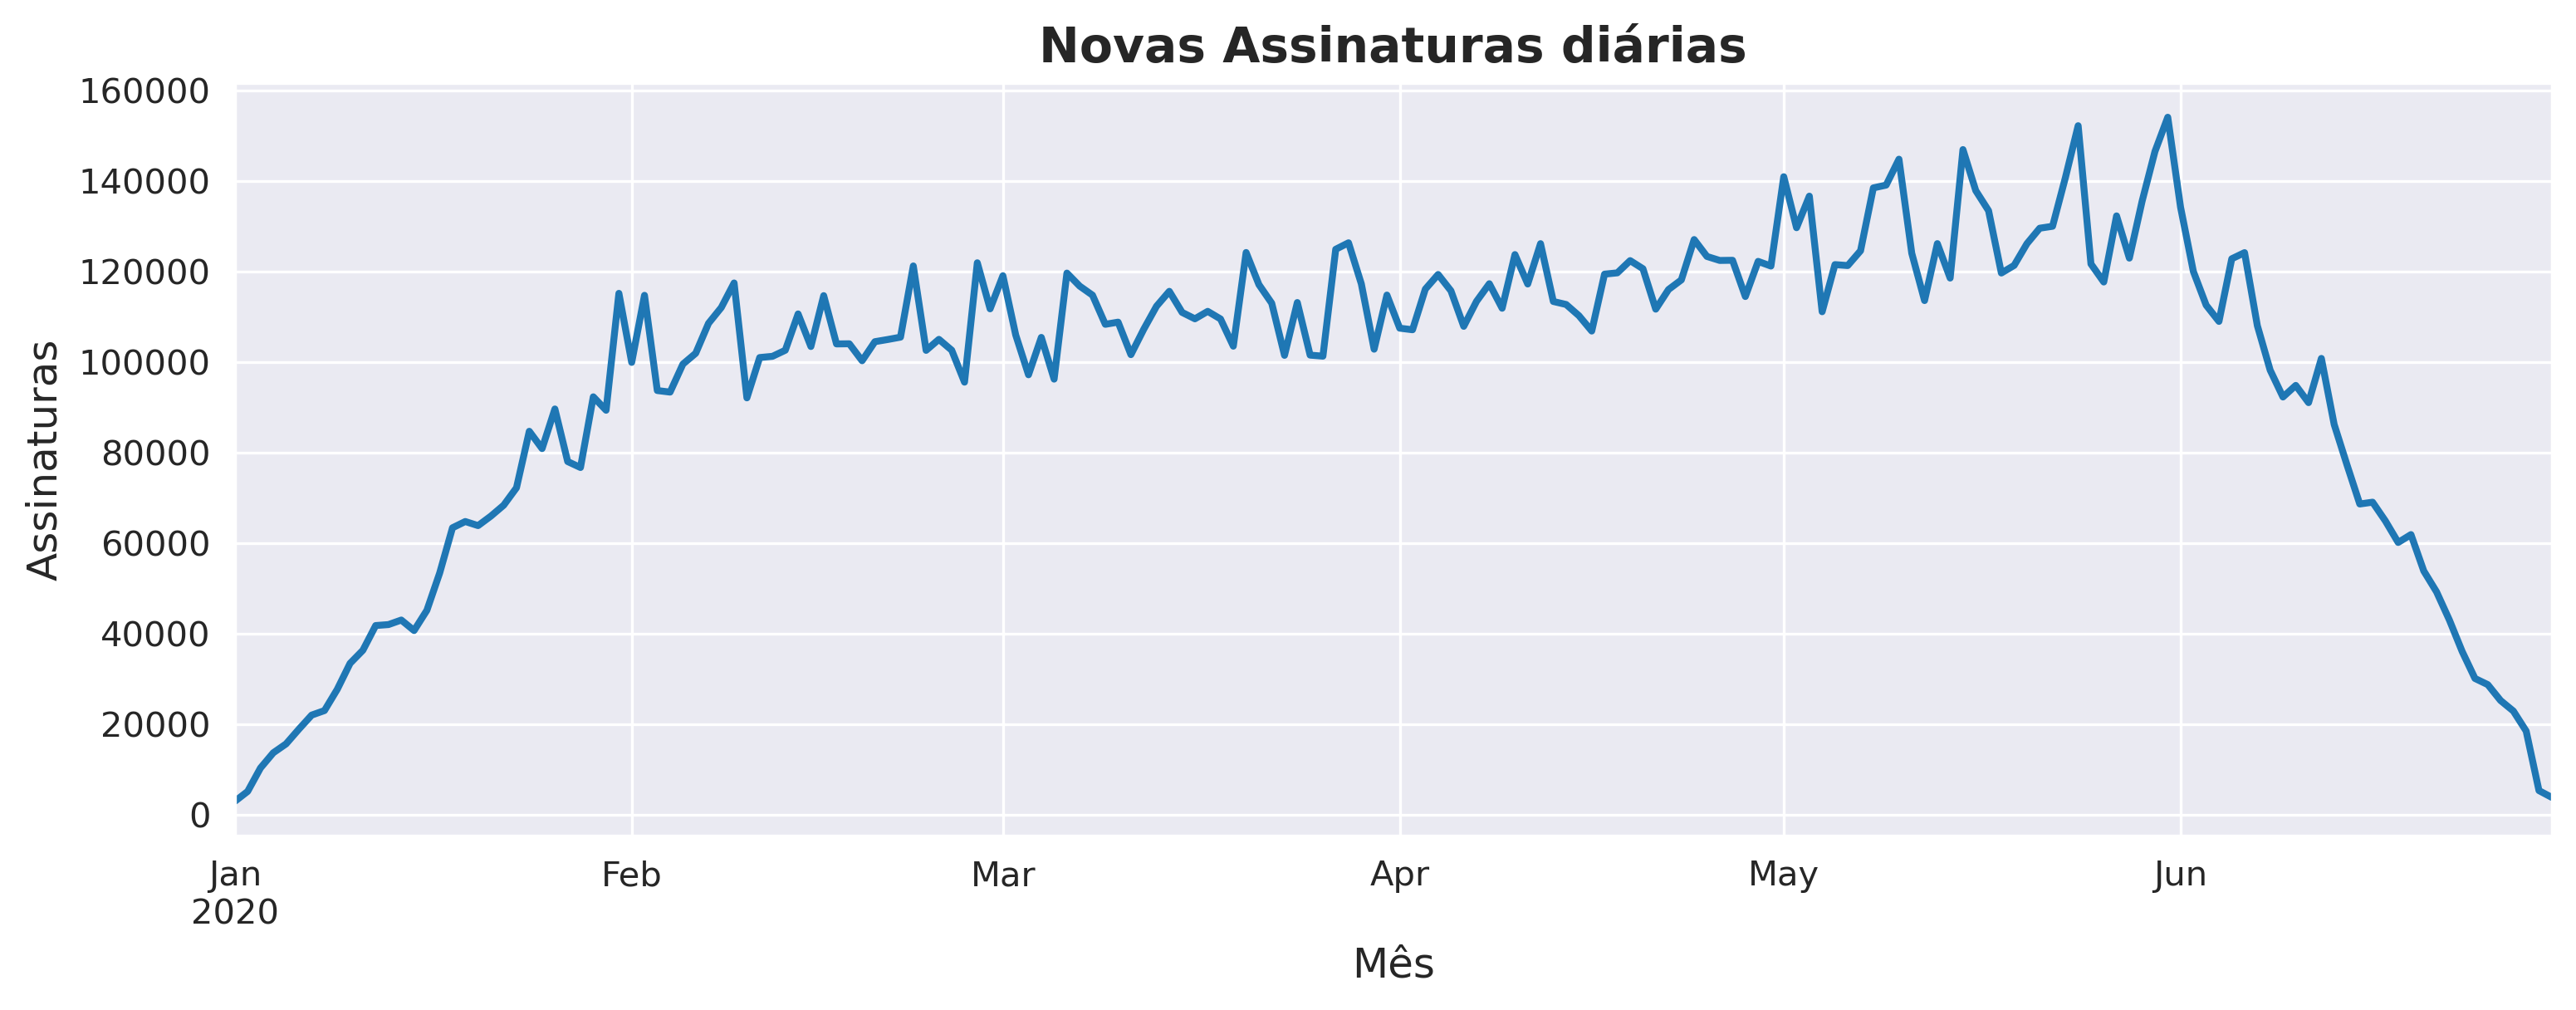

In [80]:
event_ts['account_id'].plot(linewidth=2)
plt.ylabel('Assinaturas', fontsize = 12)
plt.xlabel('Mês', fontsize = 12)
plt.title('Novas Assinaturas diárias', 
          fontsize = 14, 
          weight = 'bold')
plt.show()

O fluxo de assinaturas parece não parece ter uma sazonalidade específica, Portanto não parece haver um período do mês mais propenso à ocorrência das assinaturas.

In [101]:
event_ts['dow'] = event_ts.index.dayofweek

In [115]:
dow = ['dom','seg','ter','qua','qui','sex','sab']

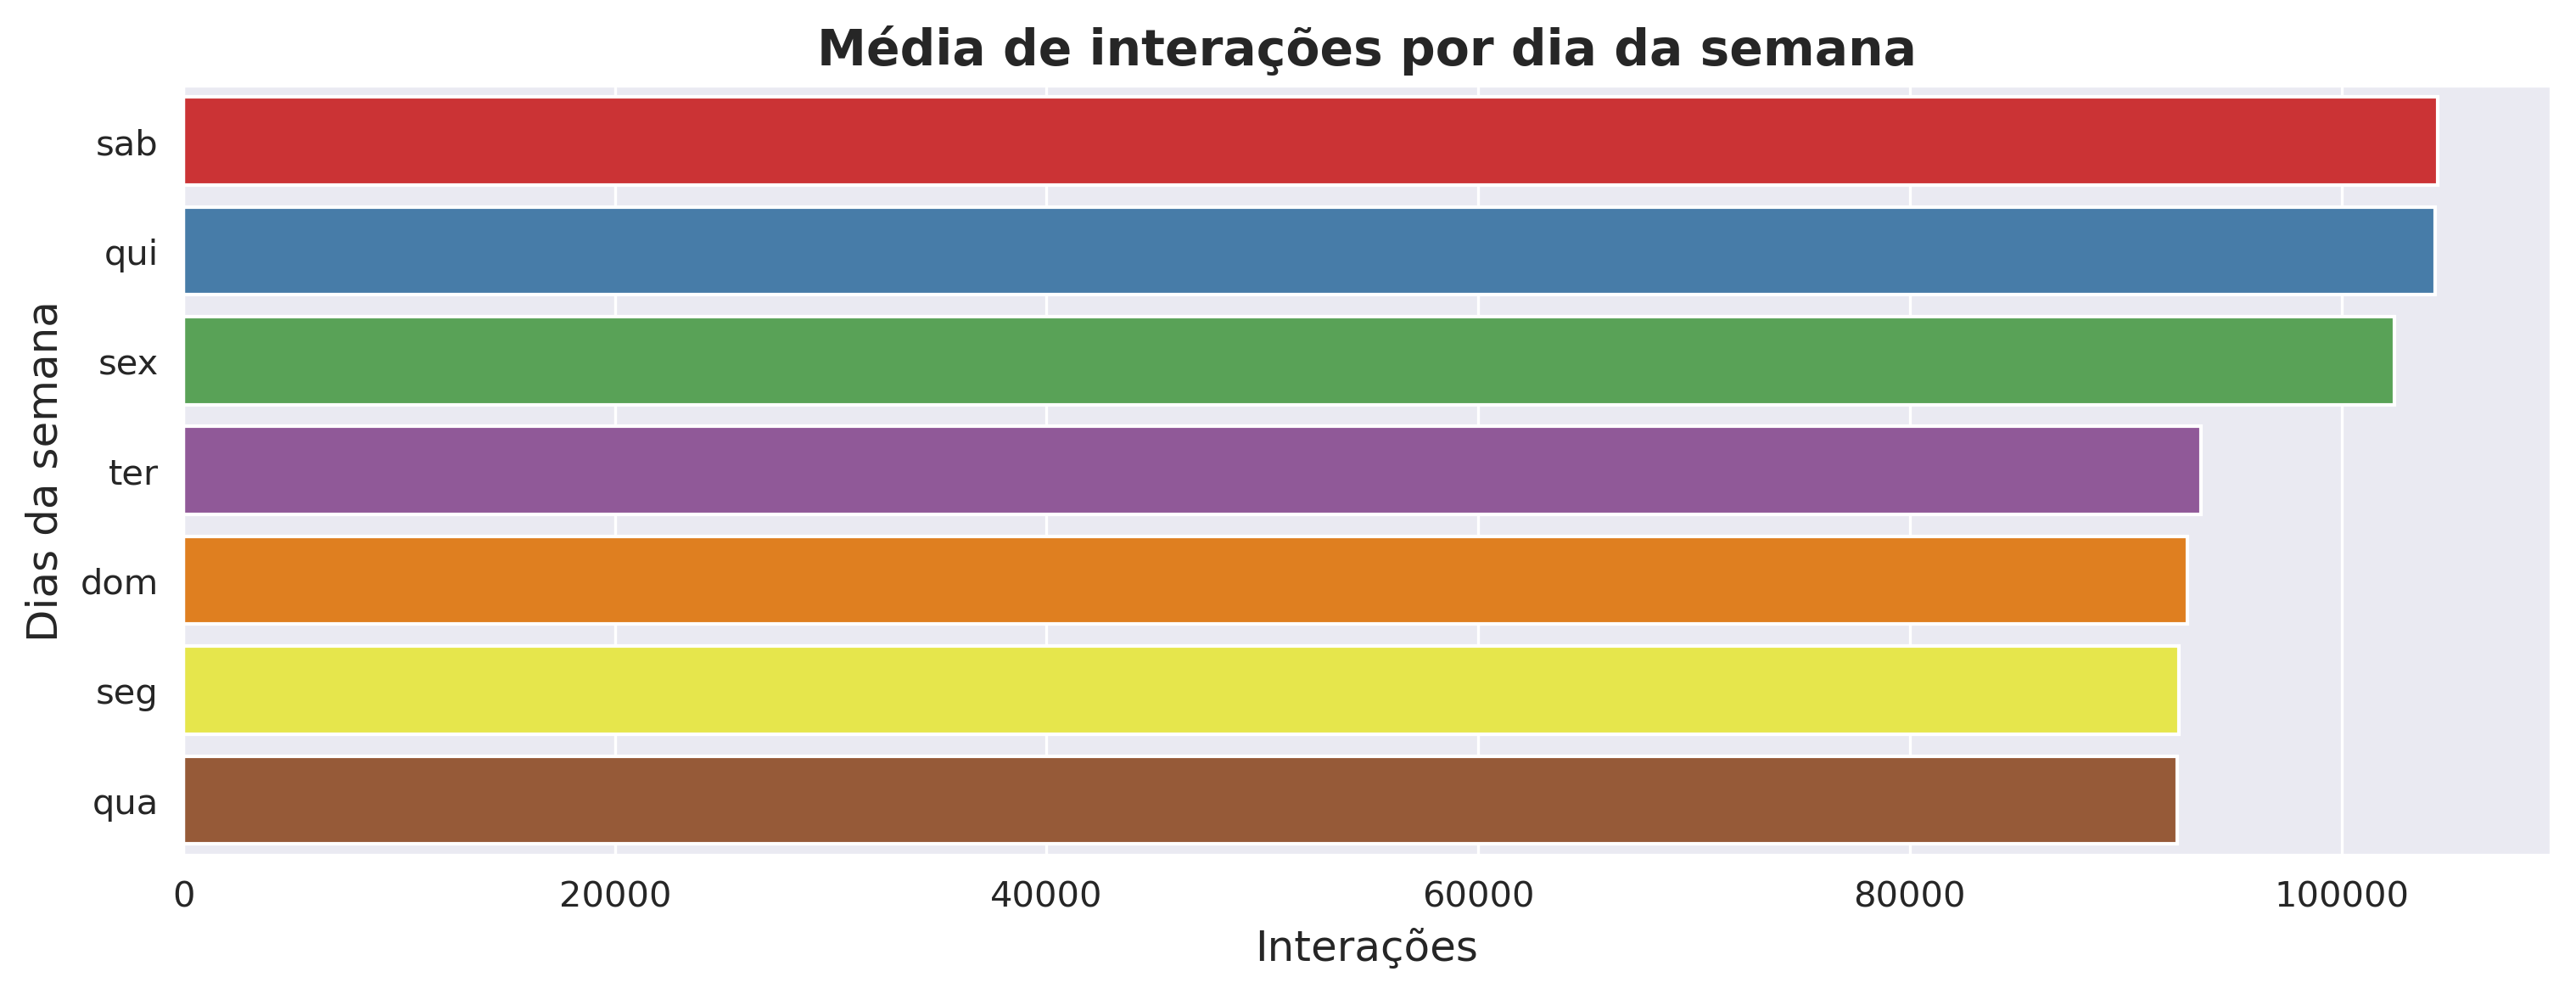

In [134]:
dow_events =event_ts.groupby('dow').mean()['account_id']
dow_events.index = dow
dow_events = dow_events.sort_values(ascending = False)
sns.barplot(y=dow_events.index, x = dow_events.values, orient = 'h', palette = 'Set1')
plt.title('Média de interações por dia da semana', weight = 'bold', fontsize = 14)
plt.xlabel('Interações', fontsize = 12)
plt.ylabel('Dias da semana', fontsize = 12)
plt.show()

Os dias com maior concentração de interações na plataforma são quinta-feira, sexta-feira e sábado. O resultado faz sentido já que a maioria do público da plataforma é adulto e provavelmente não tem muito tempo de interagir com a plataforma por conta do trabalho.

## Avaliação por horário

In [81]:
hour_event = event[['account_id','event_time']].set_index('event_time').resample('H').count()

In [82]:
hour_event['hour'] = hour_event.index.hour

In [83]:
(hour_event.groupby('hour').mean()['account_id']).plot(kind='line', marker = 'd', color = '#006400')
plt.xlim([0,23])
plt.xticks(np.arange(0,24,4))
plt.title('Média de interações por faixa horária', weight = 'bold', fontsize = 14)
plt.xlabel('Hora', fontsize = 12)
plt.ylabel('Interações', fontsize = 12)

plt.axvline(x=6, linestyle = '--', color = 'black')
plt.axvline(x=12, linestyle = '--', color = 'black')
plt.axvline(x=18, linestyle = '--', color = 'black')
plt.text(x=1.75,y=4070, s='Madrugada', fontdict={'weight':'bold'})
plt.text(x=8.25,y=4070, s='Manhã', fontdict={'weight':'bold'})
plt.text(x=14.5,y=4070, s='Tarde', fontdict={'weight':'bold'})
plt.text(x=20,y=4070, s='Noite', fontdict={'weight':'bold'})

plt.show()

In [84]:
print('O gráfico mostra que o período de pico de interações com maior estabilidade ocorre durante a tarde, das 12:00 às 18:00.')
print(f"No entanto, a média de interações por horário, em geral, é relativamente constante ficando entre {round(hour_event.groupby('hour').mean()['account_id'].min(),0)} e {round(hour_event.groupby('hour').mean()['account_id'].max(),0)} interações por hora.")

O gráfico mostra que o período de pico de interações com maior estabilidade ocorre durante a tarde, das 12:00 às 18:00.
No entanto, a média de interações por horário, em geral, é relativamente constante ficando entre 4057.0 e 4071.0 interações por hora.


## Perfil dos países por grupo etário e canal de assinatura

In [85]:
age_country = account_subscription.groupby(['country','age_group'])['age'].count().reset_index()

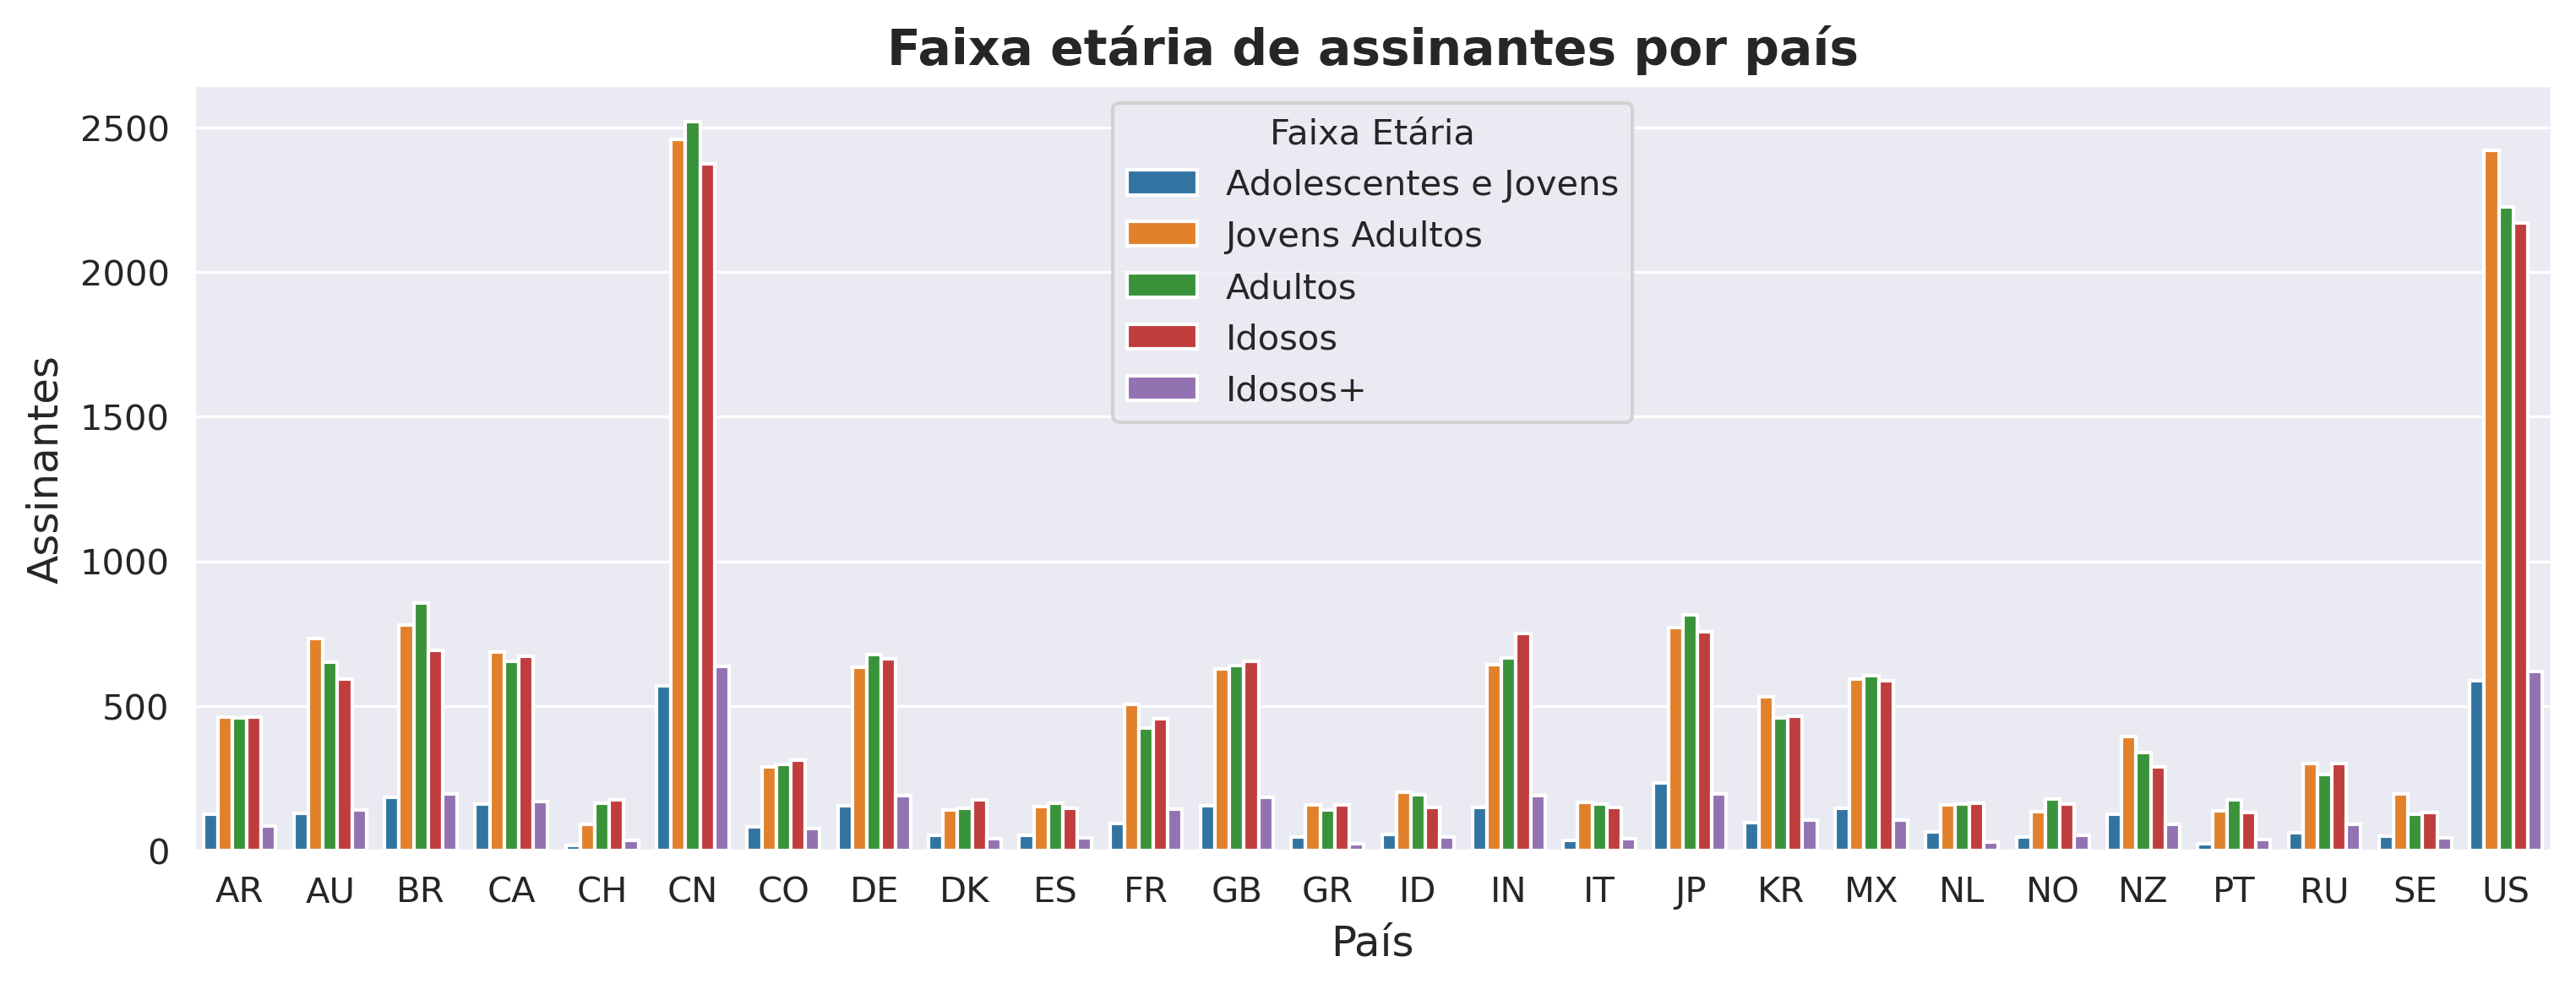

In [86]:
sns.barplot(data = age_country, 
            x    = 'country',
            y    = 'age',
            hue  = 'age_group')

plt.xlabel('País', fontsize = 12)
plt.ylabel('Assinantes', fontsize = 12)
plt.title('Faixa etária de assinantes por país', fontsize = 14, weight = 'bold')
plt.legend(title = 'Faixa Etária')
plt.show()

In [87]:
channel_country = account_subscription.groupby(['country','channel'])['age'].count().reset_index()

In [88]:
sns.barplot(data = channel_country, 
            x    = 'country',
            y    = 'age',
            hue  = 'channel')

plt.xlabel('País', fontsize = 12)
plt.ylabel('Assinantes', fontsize = 12)
plt.title('Canais de assinatura utilizados por país', fontsize = 14, weight = 'bold')
plt.legend(title = 'Canal de Assinatura')

plt.show()

A escala preferência pelos canais de acesso são as mesmas em todos os países onde o produto é consumido.

## Canais de assinatura por faixa etária

In [89]:
channel_age = account_subscription.groupby(['age_group','channel'])['age'].count().reset_index()

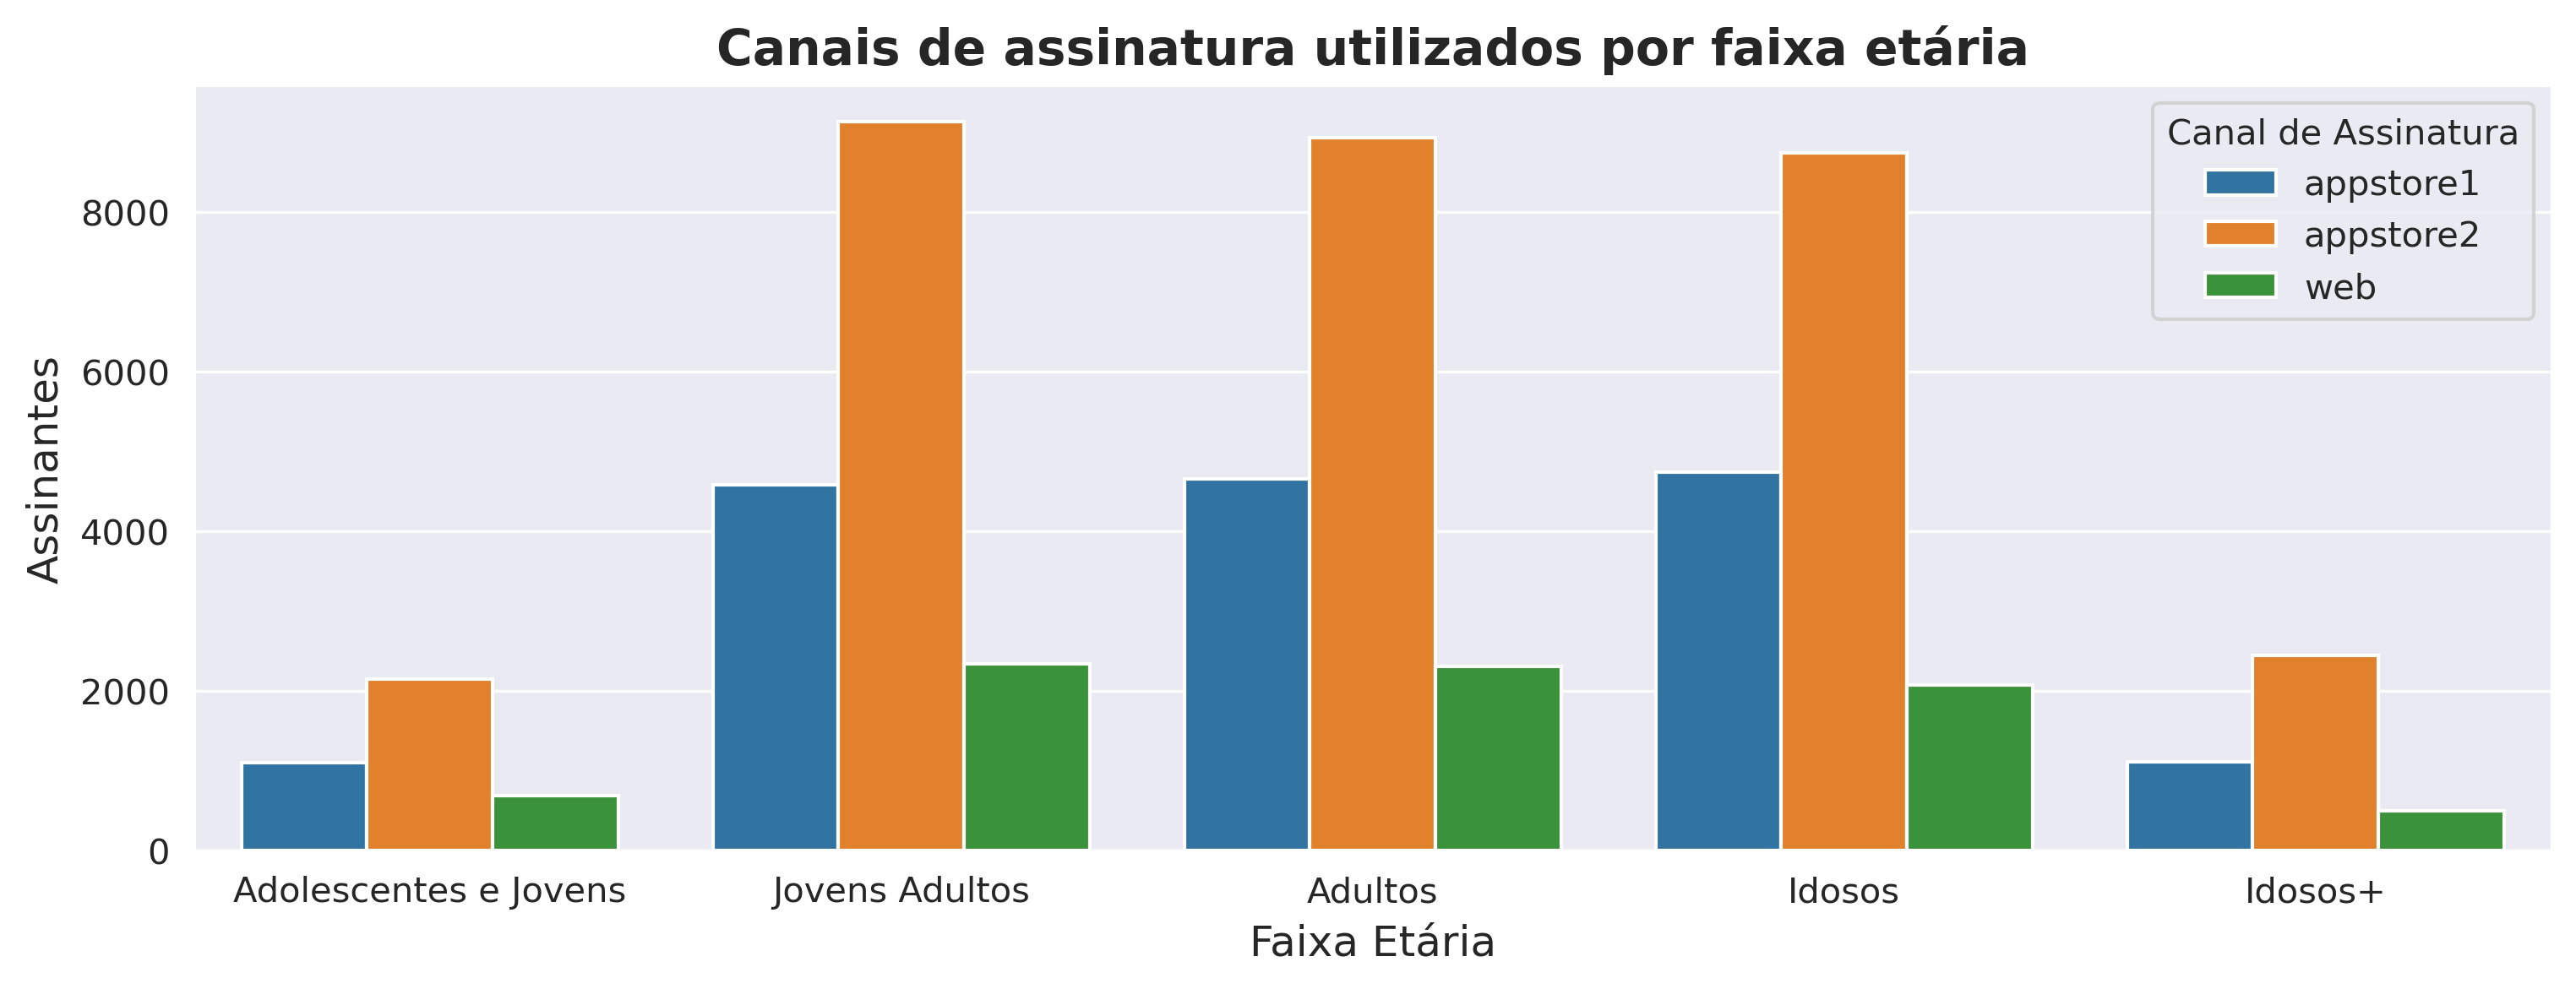

In [90]:
sns.barplot(data = channel_age, 
            x    = 'age_group',
            y    = 'age',
            hue  = 'channel')

plt.xlabel('Faixa Etária', fontsize = 12)
plt.ylabel('Assinantes', fontsize = 12)
plt.title('Canais de assinatura utilizados por faixa etária', fontsize = 14, weight = 'bold')
plt.legend(title = 'Canal de Assinatura')
plt.show()

## Quem são os clientes que renovaram a assinatura em julho?

### Canais de assinatura utilizados 

In [91]:
clients_july = account_subscription[account_subscription['end_month'] == 7]

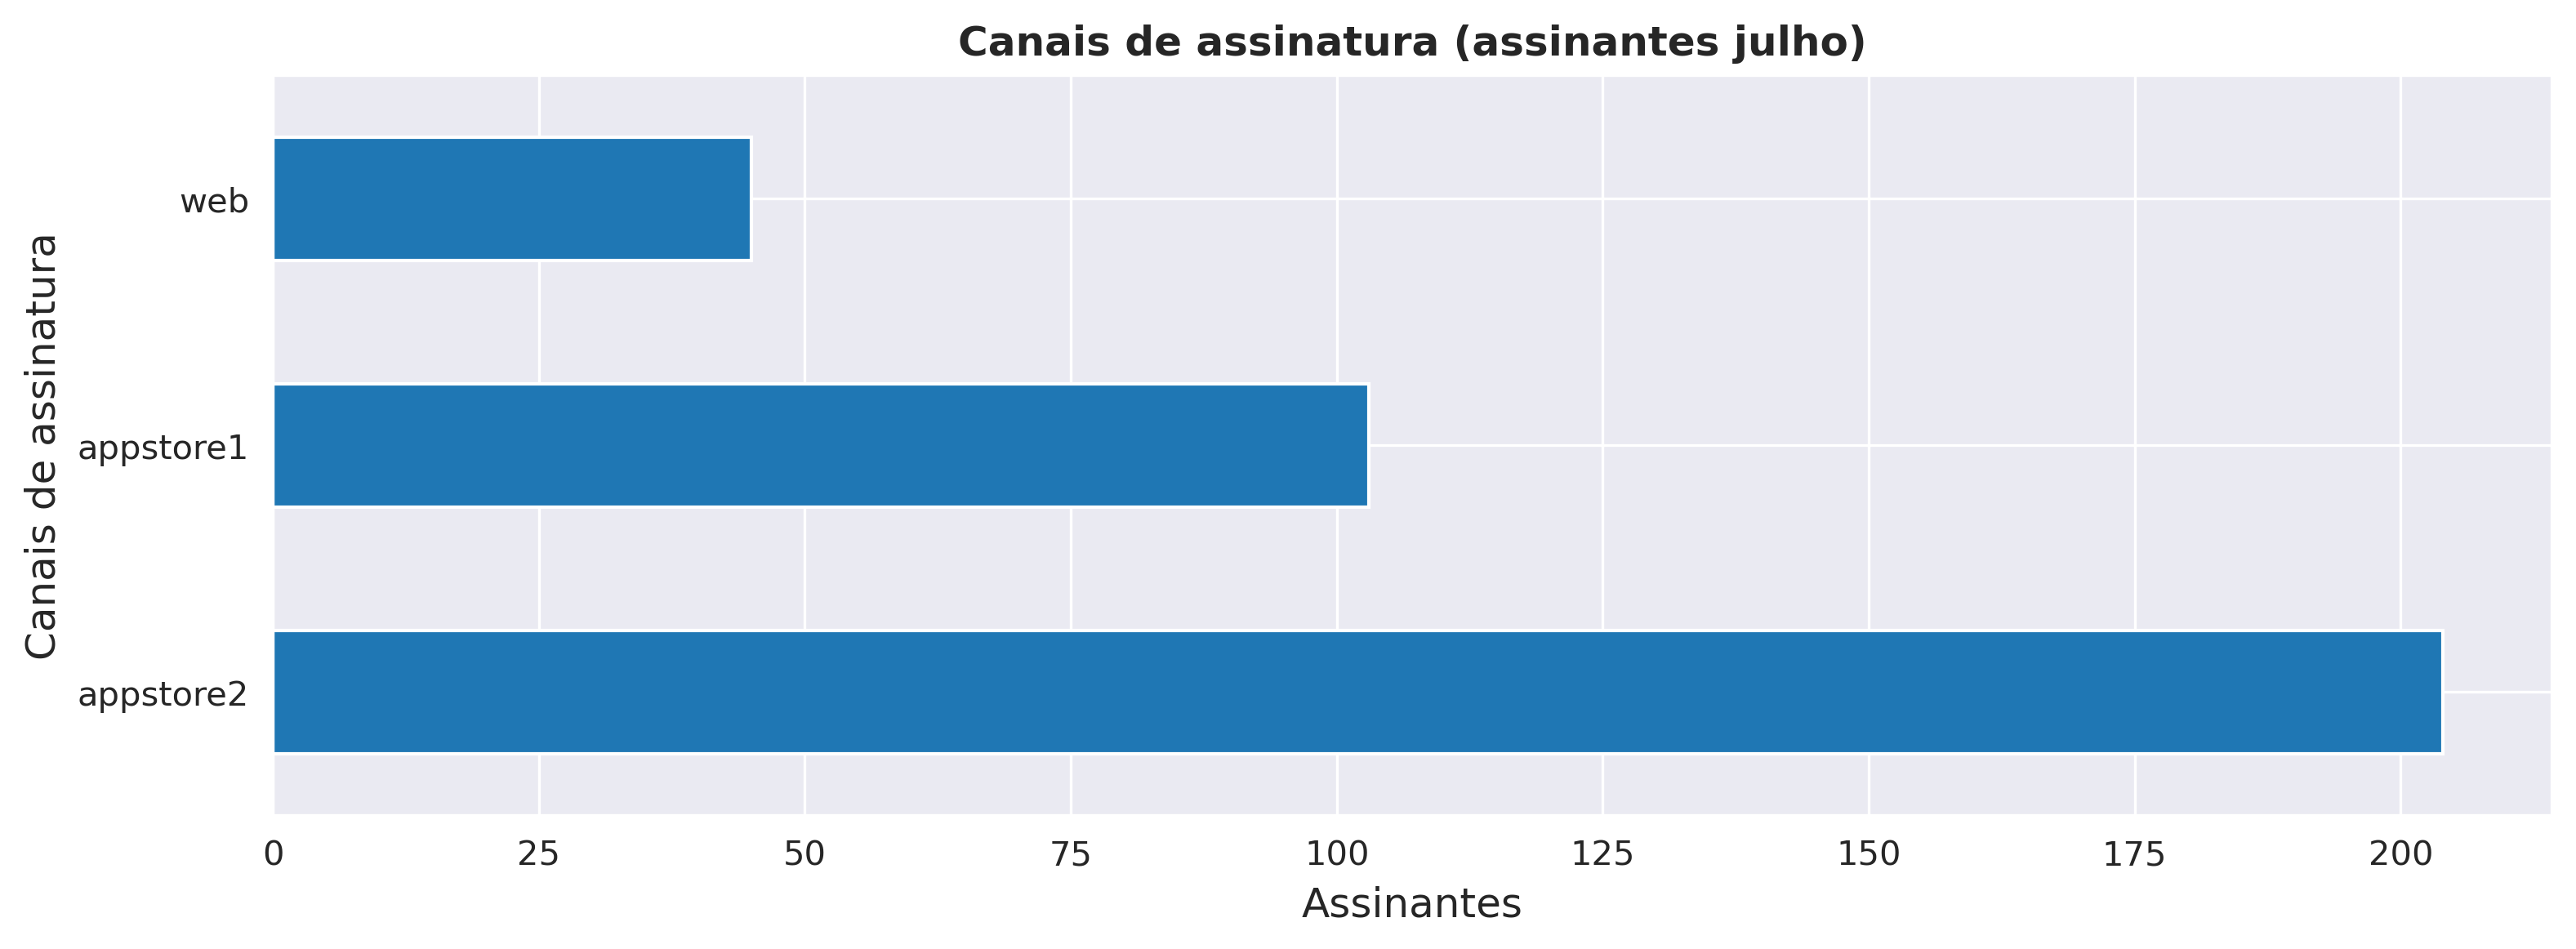

In [342]:
(clients_july.channel.value_counts()).plot(kind='barh')
plt.title('Canais de assinatura (assinantes julho)', weight = 'bold', fontsize = 12)
plt.xlabel('Assinantes',fontsize = 12)
plt.ylabel('Canais de assinatura',fontsize = 12)
plt.show()

### Faixa etária

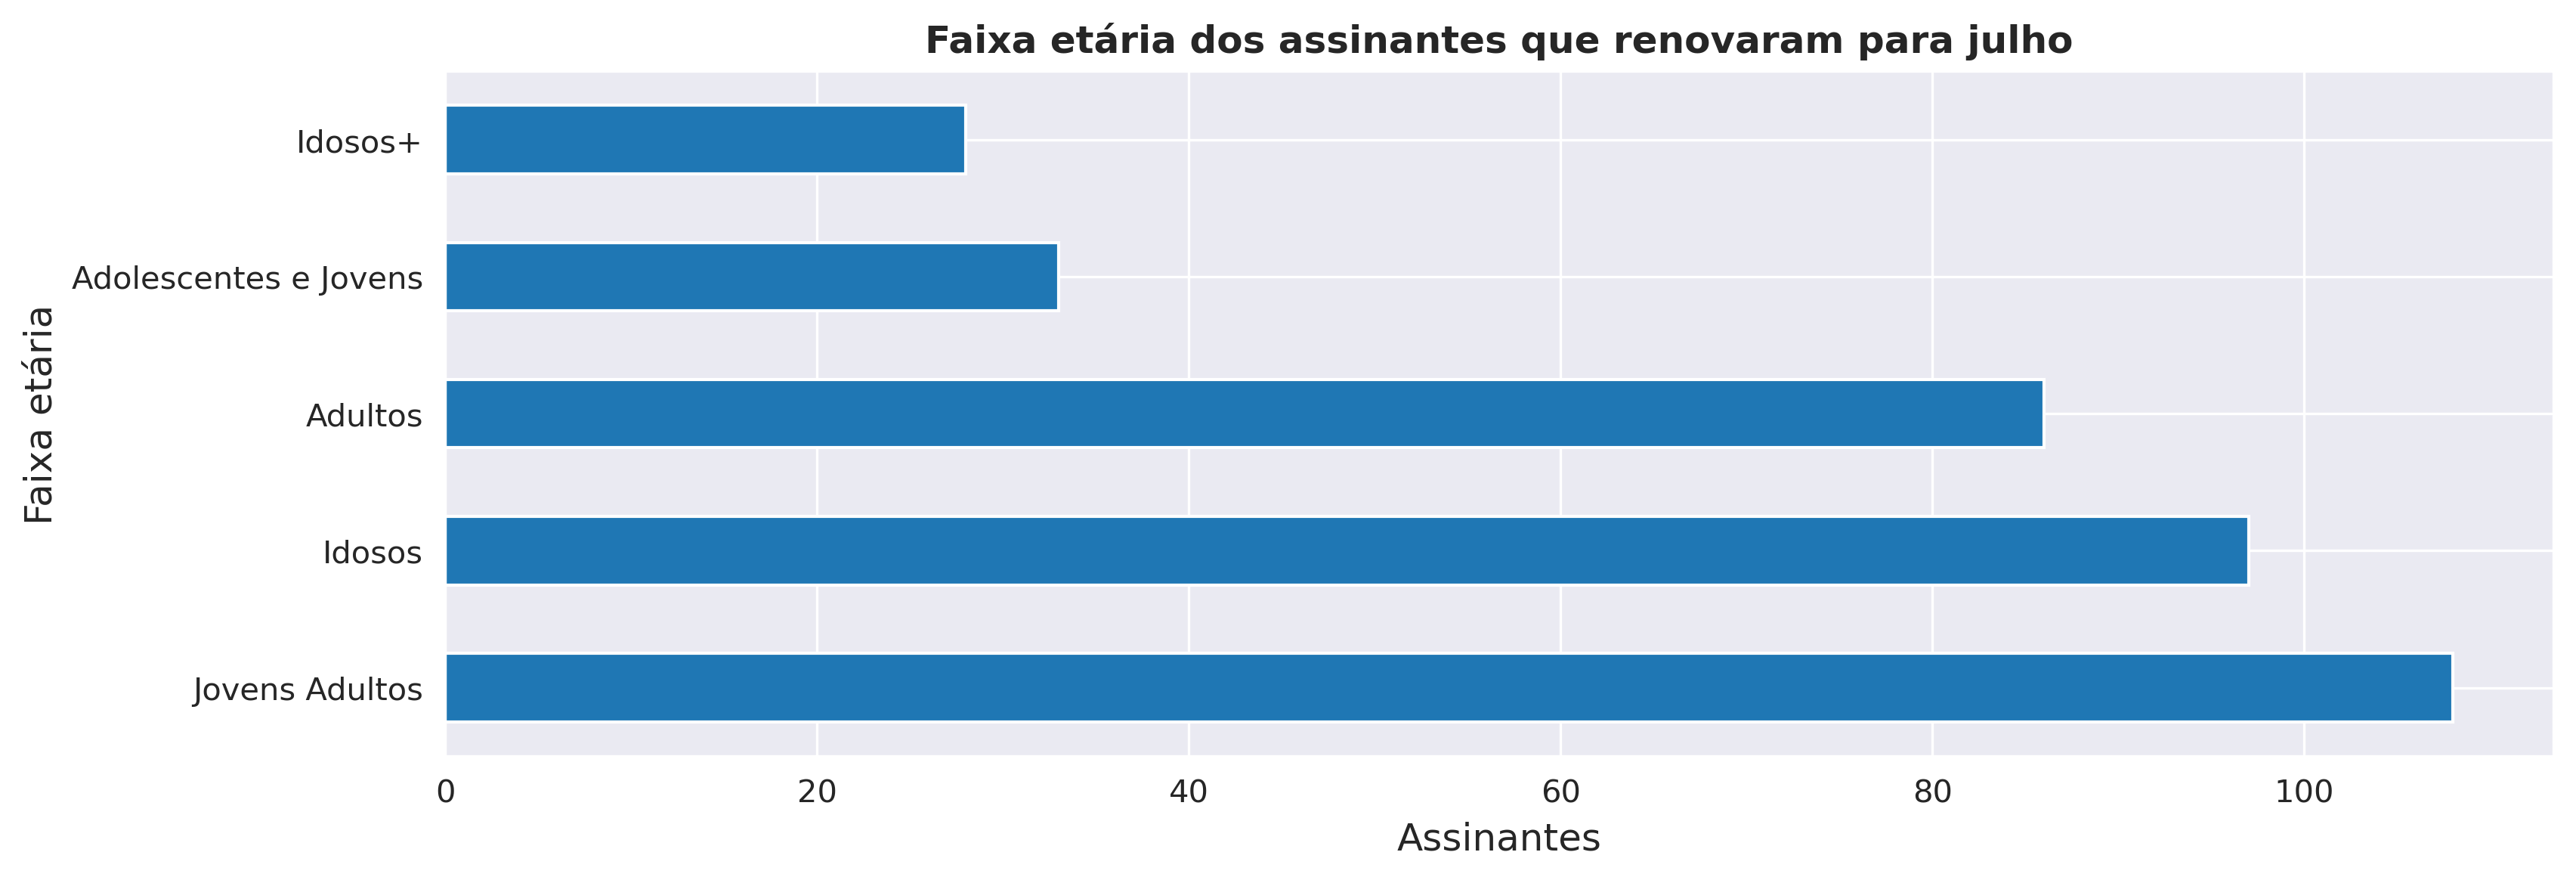

In [336]:
(clients_july.age_group.value_counts()).plot(kind='barh')
plt.title('Faixa etária (assinantes julho)', weight = 'bold', fontsize = 12)
plt.xlabel('Assinantes',fontsize = 12)
plt.ylabel('Faixa etária',fontsize = 12)
plt.show()

### Histórico de interações com a plataforma

In [94]:
event_clients_july = event[event.account_id.isin(clients_july.account_id.values)]

In [95]:
ecj_groupby = (event_clients_july.groupby(['month','event_type_id']).count()).reset_index()

In [340]:
sns.lineplot(data   =  ecj_groupby, 
             x      = 'month',
             y      = 'account_id',
             hue    = 'event_type_id', 
             marker = 'o')

plt.legend(event_type.event_type_name.unique().tolist())
plt.title('Histórico de interações (assinantes julho)', weight = 'bold', fontsize = 12)
plt.xlabel('Mês',fontsize = 12)
plt.ylabel('Assinantes',fontsize = 12)
plt.xticks(np.arange(1,7), meses.values())
plt.show()

### Tempo que utilizam a plataforma

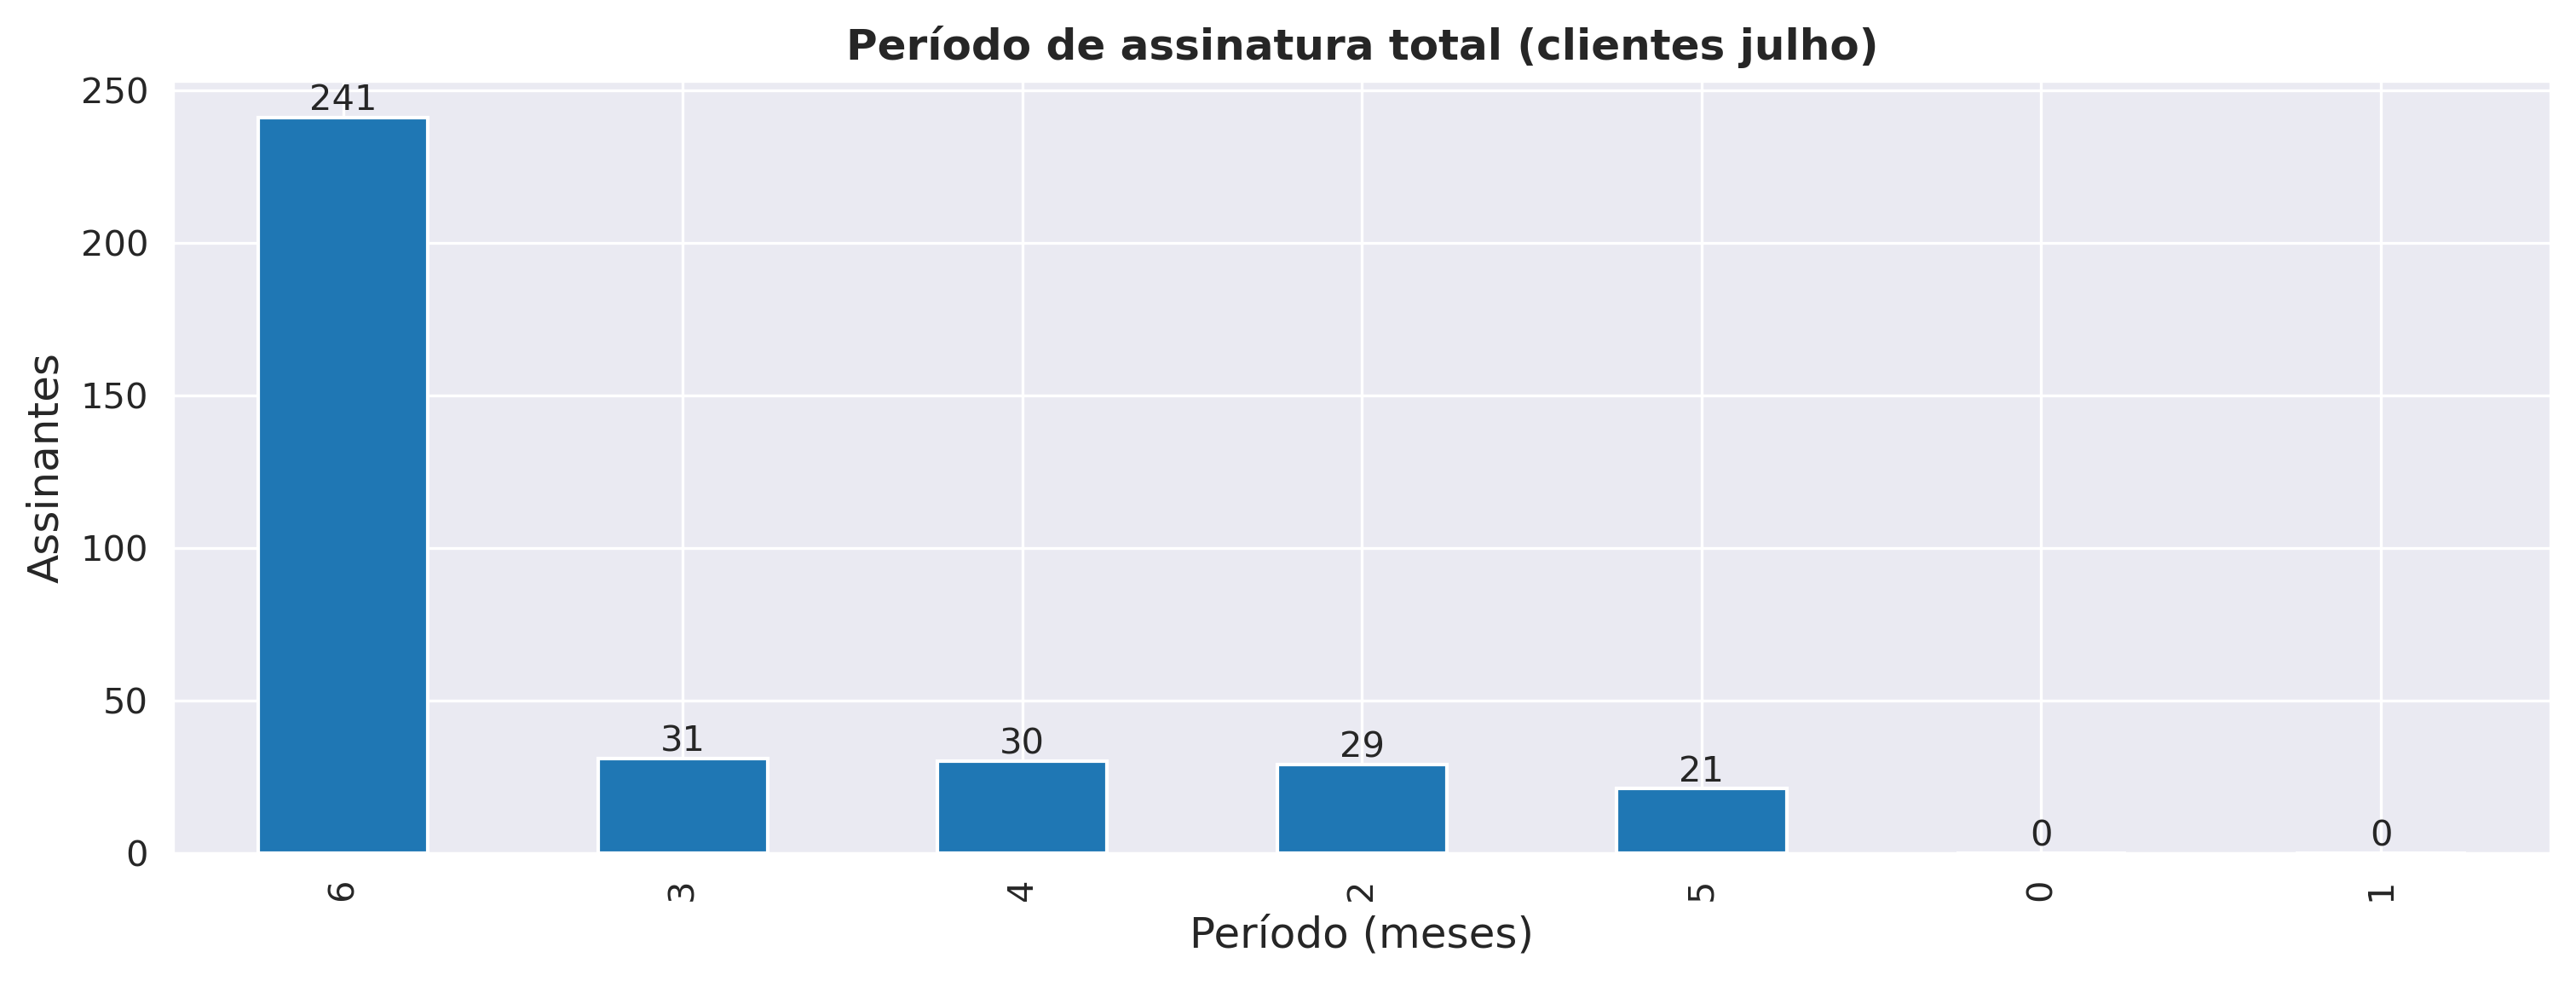

In [98]:
ax = ltv.loc[clients_july.account_id.values,:].period.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.title('Período de assinatura total (clientes julho)', weight = 'bold', fontsize = 12)
plt.xlabel('Período (meses)',fontsize = 12)
plt.ylabel('Assinantes',fontsize = 12)
plt.show()

A maior parte dos assinantes do mês de julho são mais fieis ao conteúdo do site, já sendo usuários há, pelo menos, 6 meses.

Não há evidências fortes, pelos dados fornecidos, que os clientes que ainda renovaram sua assinatura para o mês de julho sejam diferentes dos demais clientes que não renovaram suas assinaturas.

# Data Science

## Data Wrangling

In [275]:
usr         = event.pivot_table(index = ['account_id', 'month'], columns = 'event_type_id', aggfunc = 'count').reset_index()
usr.columns = usr.columns.droplevel(0)
usr.columns = ['id','month','post','newfriend','like','adview','dislike','unfriend','message','reply']

In [276]:
usr['total'] = usr.loc[:,'post':'reply'].sum(axis=1)

In [277]:
usr = usr[usr.total != 0]

In [278]:
usr.head()

id month  post  newfriend  like  adview  dislike  unfriend  message  reply  \
0  1     1    62         15    64      32        2         0       30     13   
1  1     2    68         12    59      33        7         0       21      7   
2  1     3    63         12    69      44       11         0       18      9   
3  1     4    60         10    70      32        3         1       22     17   
4  1     5    76          8    61      43        2         0       32     13   

   total  
0    218  
1    207  
2    226  
3    215  
4    235

In [279]:
sub1 = subscription.sort_values(by=['account_id','start_date'])

In [280]:
sub1['next_'] = sub1.account_id.shift(-1)

In [281]:
sub1['churn'] = sub1.account_id != sub1.next_
sub1.churn = sub1.churn.astype('int').astype('category')

In [282]:
sub1['month'] = sub1.start_date.dt.month

In [283]:
sub1 = sub1[['account_id','month','churn']]

In [284]:
sub1.head()

account_id  month churn
0          1      1     0
1          1      2     0
2          1      3     0
3          1      4     0
4          1      5     1

In [395]:
usrx = usr.merge(right = sub1, how = 'right', right_on=['account_id','month'], left_on = ['id', 'month']).drop('account_id', axis = 1).dropna()

In [396]:
usrx = usrx[(usrx.month != 5) & (usrx.month != 6)]

In [397]:
usrx.drop(['id','month'], axis = 1, inplace = True)

In [ ]:
sns.pairplot(usrx, hue = 'churn')

In [487]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.s
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve

In [399]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [430]:
X = usrx.drop(['churn'], axis = 1)
y = usrx.churn

In [431]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, shuffle = True, random_state = 42)

In [432]:
y_train.value_counts(normalize = True)

0    0.947452
1    0.052548
Name: churn, dtype: float64

In [500]:
l1 = LogisticRegression(class_weight ={0:0.05, 1:0.95}, )

In [501]:
l1.fit(X_train, y=y_train)

LogisticRegression(class_weight={0: 0.05, 1: 0.95})

In [502]:
y_pred = l1.predict(X_test)
recall_score(y_test, y_pred)

0.806049822064057

In [503]:
roc_auc_score(y_test, y_pred)

0.6570017907869934

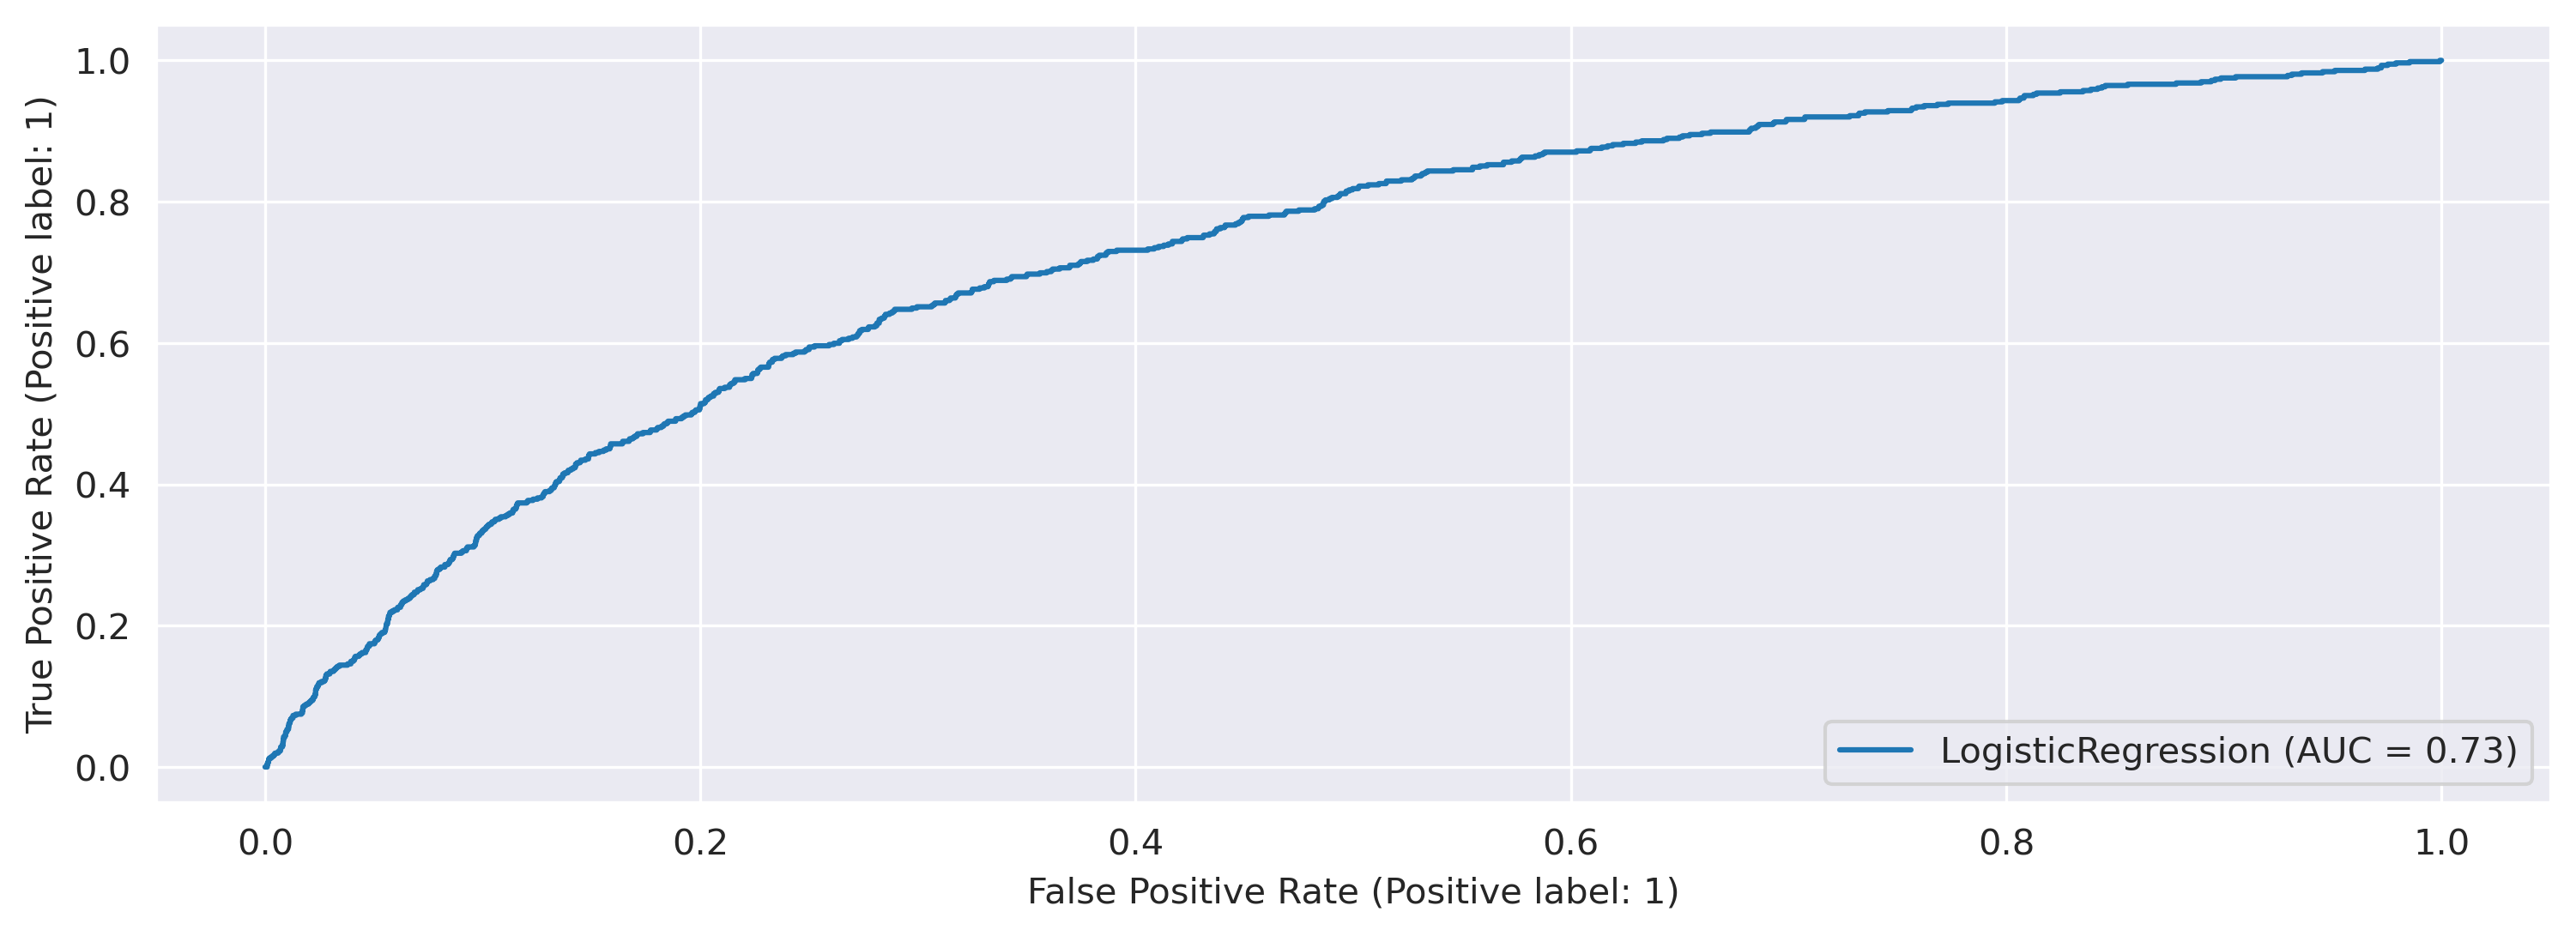

In [495]:
plot_roc_curve(l1,X_test,y_test)

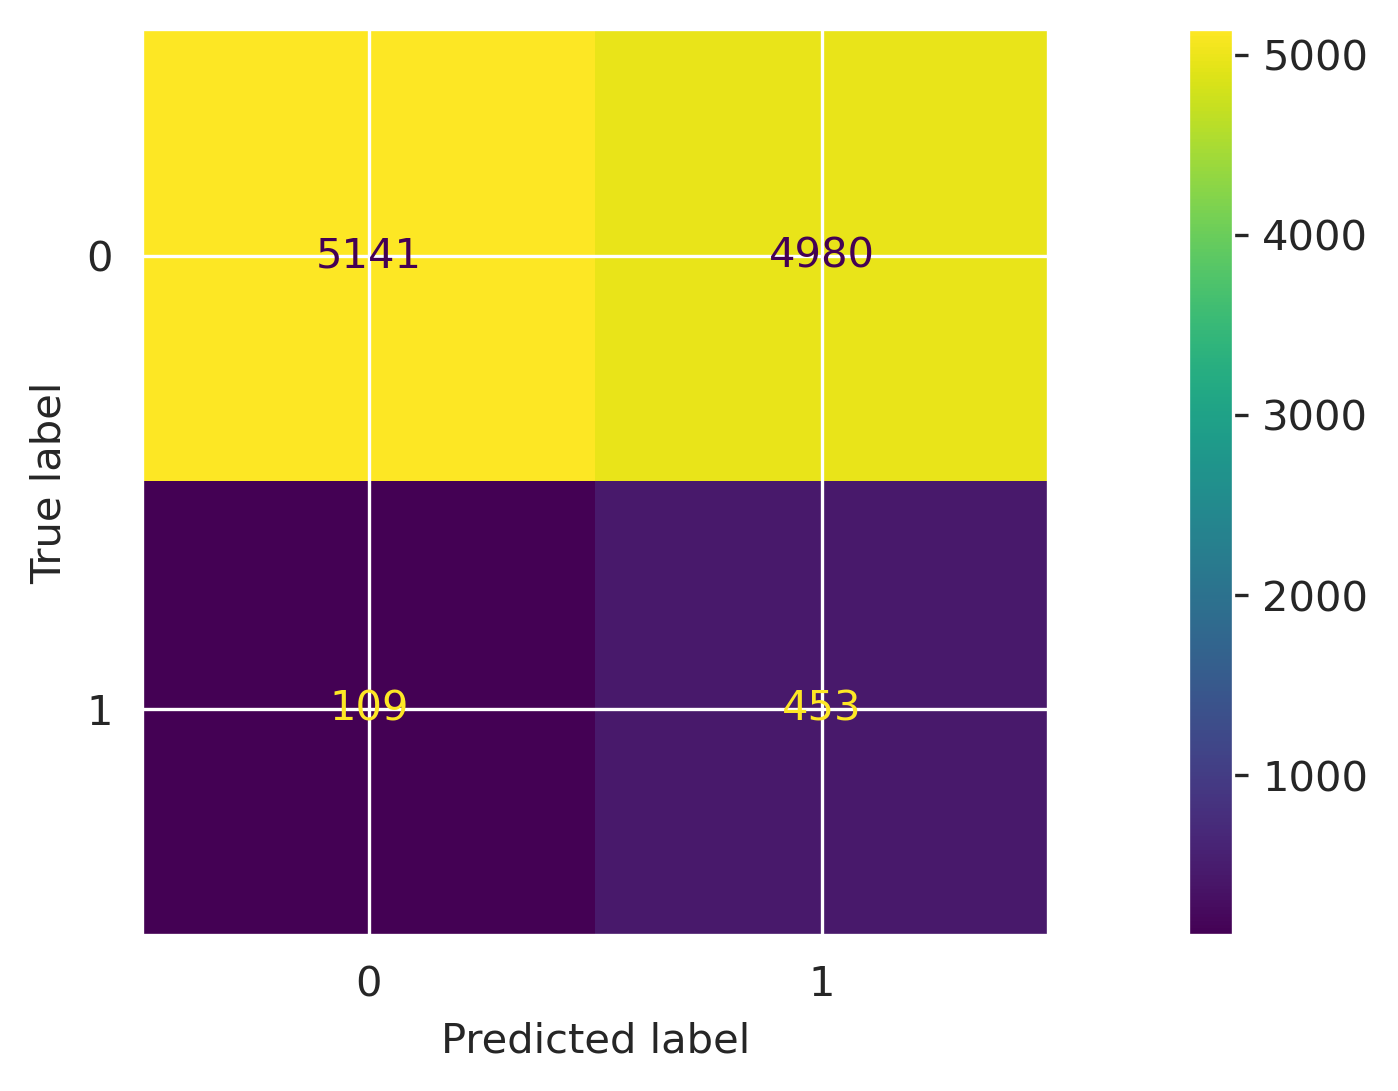

In [485]:
plot_confusion_matrix(l1, X_test, y_test)

# Sumário e Conclusões

* A plataforma possui apenas apenas produto com um único período de serviço de assinatura e um preço único. A adição de novos planos mais personalizados ao gosto do cliente, como planos de assinatura mais longos (trimestrais, semestrais, anuais), recursos únicos por modalidade de assinatura, produtos com uma faixa de preços dos mais acessíveis aos mais sofisticados podem aumentar o interesse no consumo do produto. 

* A maior parte do público assinante está na vida adulta. Por isso, a comunicação, aparência e conteúdos trazidos para a plataforma devem dialogar com esse público para que se identifiquem, além de atrair o tipo certo clientes, que apreciem a proposta de valor do produto e tenham menor probabilidade desejar deixar de consumi-lo.

* A queda simultânea nas assinaturas e interações em diversos países, sendo Estados Unidos e China os principais, pode indicar falhas na manutenção da atividade da plataforma que impediu que seus assinantes continuassem a renovar seus pedidos de assinatura. Outra possibilidade é que um novo produto que com características semelhantes e um alinhamento maior com as necessidades dos clientes foi lançado e puxou para si os clientes da plataforma. 

* A maior parte dos clientes dos assinantes já vinha consumindo o produto desde o primeiro mês do período analisado, o que pode reforçar, como mencionado acima, ou a falha na qualidade de entrega do produto ou o lançamento de uma nova ferramenta combinado à falha do processo fidelização do assinante com a plataforma.

* A maior parte das atividades na plataforma parece ocorrer na véspera dos finais de semana, com um pico maior de interações na parte da noite. Ainda, a plataforma poderia oferecer um período gratuito de acesso ao conteúdo para que novos clientes possam testar e avaliar o produto.